# Devoloping an Advertisement Proposal

### Project Purpose 
The purpose of the notebook is to explore the demographics of nearby schools, analyze how certain demographic groups performed on the Smarter Balanced Exam, and delve deeper into the proposed Marketing idea. 

It is important to understand the scope of this project. This notebook provides a  deeper understanding of the schools, but stops short of recommending the exact parameters which should be inputed in Facebook's Ad Manager. This is because to do so would require more careful analysis of the surrounding community. I believe that this analysis should be done in another notebook. 

The goal of this notebook is to thoroughly develop a proposal for the ad idea, which will be presented to the organization.
 
 ### The Idea 
Every year California students are required to take the Smarter Balanced ELA/ Math Exam. This is a cumulative exam given in the end of the school year to gauge student understading of core concepts. Parents recieve the results by paper in August. Therefore, my propsed idea is to create an ad campaign based on this exam. Specifically, in August, I am proposing that the tutoring service realeases facebook ads that convey the message that their services would help improve their students performance on these tests. I hypothesize that that by posting ads that specifically target this event, we would be able to increase clicks in August, which is a critical month as it is right before school starts. This is  because the content will be more relevent to the target audience. 

## General Ad Structure 

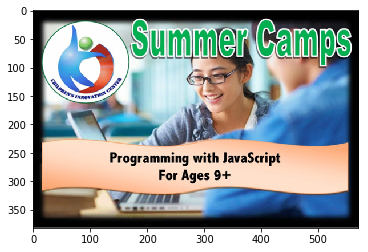

In [142]:
import matplotlib.image as mpimg
img=mpimg.imread(r"C:\Users\Pavan\Desktop\picture1.png")
imgplot = plt.imshow(img)
plt.show()

This is a current ad that the company is running, and the format that should be adhered to. It is very simple, and consists of 4 elements:  Company Logo, Service Proivded(in Green),banner text, and picture. 
For my ad, the logo will stay the same. There will be two ads- an english ad and a Math ad. Therefore, the Green Text, will be either" Math Tutoring", or "English Tutoring." 
However, what is uncertain is the content of the banner and the picture. In this notebook, I will attept to clear the uncertainty through data analytics.

## Location Analysis

The first question that needs to be answered is what schools should be analyzed. To answer this question I will use the Googlemaps API to find nearby schools. 

In [29]:
!pip install googlemaps

In [2]:
import googlemaps
gmaps = googlemaps.Client(key=key)

The first step is to use the geocode function to obtain the lat/lng coordinates of the tutoring center. 

In [3]:
center=gmaps.geocode('39155 Cedar Blvd, Newark, CA')

In [4]:
center1=center[0]["geometry"]["location"]["lat"]

In [5]:
center2=center[0]["geometry"]["location"]["lng"]

In [6]:
fcenter=(center1,center2)

Using the places function, I will obtain all schools within 10 km radius of the tutoring center. 

In [7]:
schools=gmaps.places_nearby(location=fcenter,radius=10000,type="school")

In [8]:
# The following code puts the data I obtained from the Google Maps API in a pandas dataframe
import pandas as pd 
import numpy as np
df= pd.DataFrame()
name=[]
geometry=[]
rating=[]
vicinity=[]
for  i in schools["results"]: 
    name.append(i["name"])
    geometry.append(i["geometry"])
    rating.append(i["rating"])
    vicinity.append(i["vicinity"])


In [9]:
locat= []
for i in geometry: 
    locat.append(i["location"])
    

In [10]:
lat=[]
lng=[]
for i in locat:
    lat.append(i["lat"])
    lng.append(i["lng"])
def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list
combo= merge(lat,lng)

In [11]:
df["school"]= name 
df["rating"]= rating 
df["location"]= combo
df["address"]= vicinity
df

,school,rating,location,address
0,Mission San Jose High School,4.2,"(37.5442976, -121.933798)","41717 Palm Avenue, Fremont"
1,American High School,3.7,"(37.5644828, -122.0164373)","36300 Fremont Boulevard, Fremont"
2,Newark Memorial High School,2.2,"(37.52085709999999, -122.0018945)","39375 Cedar Boulevard, Newark"
3,Nurture Kids Pre-School,3.8,"(37.5576379, -121.9942273)","38000 Camden Street, Fremont"
4,John F. Kennedy High School,3.8,"(37.5286578, -121.9866462)","39999 Blacow Road, Fremont"
5,Centerville Junior High School,4.8,"(37.555265, -122.001007)","37720 Fremont Boulevard, Fremont"
6,Challenger School - Ardenwood,4.3,"(37.5469751, -122.0532927)","35487 Dumbarton Court, Newark"
7,Newark Junior High School,4.0,"(37.5416208, -122.0402327)","6201 Lafayette Avenue, Newark"
8,Forest Park Elementary School,3.9,"(37.562005, -122.052253)","34400 Maybird Circle, Fremont"
9,Cesar Chavez Middle School,3.0,"(37.59129410000001, -122.0483208)","2801 Hop Ranch Road, Union City"


In [12]:
# Dropping the Swim School and Pre School
df=df.drop([3,18])
df=df.reset_index()
df.drop("index", axis=1, inplace=True)
#df.drop("level_0", axis=1, inplace=True)

In [14]:
df

,school,rating,location,address
0,Mission San Jose High School,4.2,"(37.5442976, -121.933798)","41717 Palm Avenue, Fremont"
1,American High School,3.7,"(37.5644828, -122.0164373)","36300 Fremont Boulevard, Fremont"
2,Newark Memorial High School,2.2,"(37.52085709999999, -122.0018945)","39375 Cedar Boulevard, Newark"
3,John F. Kennedy High School,3.8,"(37.5286578, -121.9866462)","39999 Blacow Road, Fremont"
4,Centerville Junior High School,4.8,"(37.555265, -122.001007)","37720 Fremont Boulevard, Fremont"
5,Challenger School - Ardenwood,4.3,"(37.5469751, -122.0532927)","35487 Dumbarton Court, Newark"
6,Newark Junior High School,4.0,"(37.5416208, -122.0402327)","6201 Lafayette Avenue, Newark"
7,Forest Park Elementary School,3.9,"(37.562005, -122.052253)","34400 Maybird Circle, Fremont"
8,Cesar Chavez Middle School,3.0,"(37.59129410000001, -122.0483208)","2801 Hop Ranch Road, Union City"
9,Hopkins Junior High School,3.8,"(37.5465931, -121.9415914)","600 Driscoll Road, Fremont"


In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

In [14]:
nlats=[]
nlngs=[]
for i in df["location"]:
    nlats.append(i[0])
    nlngs.append(i[1])

In [15]:
df["lat"]=nlats
df["lngs"]=nlngs
df

,school,rating,location,address,lat,lngs
0,Mission San Jose High School,4.2,"(37.5442976, -121.933798)","41717 Palm Avenue, Fremont",37.544298,-121.933798
1,American High School,3.7,"(37.5644828, -122.0164373)","36300 Fremont Boulevard, Fremont",37.564483,-122.016437
2,Newark Memorial High School,2.2,"(37.52085709999999, -122.0018945)","39375 Cedar Boulevard, Newark",37.520857,-122.001895
3,John F. Kennedy High School,3.8,"(37.5286578, -121.9866462)","39999 Blacow Road, Fremont",37.528658,-121.986646
4,Centerville Junior High School,4.8,"(37.555265, -122.001007)","37720 Fremont Boulevard, Fremont",37.555265,-122.001007
5,Challenger School - Ardenwood,4.3,"(37.5469751, -122.0532927)","35487 Dumbarton Court, Newark",37.546975,-122.053293
6,Newark Junior High School,4.0,"(37.5416208, -122.0402327)","6201 Lafayette Avenue, Newark",37.541621,-122.040233
7,Forest Park Elementary School,3.9,"(37.562005, -122.052253)","34400 Maybird Circle, Fremont",37.562005,-122.052253
8,Cesar Chavez Middle School,3.0,"(37.59129410000001, -122.0483208)","2801 Hop Ranch Road, Union City",37.591294,-122.048321
9,Hopkins Junior High School,3.8,"(37.5465931, -121.9415914)","600 Driscoll Road, Fremont",37.546593,-121.941591


The below map helps illustrate the distance from the schools to the tutoring center(red). It is also interesting to see how the schools are diststributed. It appears that some lower schools are paired with a high school. For instance. John M Horner, is located very closely to Irvington. This means that that the high school students were probably students of this lower school. The benifits of this map extend outside of marketing, as it allows us to better understand the educational journey of our students.  
Here are the linkages I see based on this map: 
1. Irvington and Horner 
2. Hopkins and Mission San Jose 
3. Washington and Centerville
4. Washington and Parkmont 
5. Olivera and American 
6. Warwick and American 
7. Forest Park and Newark Junior High 
8. Warwick and Cesar Chavez
9. Centerville and Parkmont 
10. Newark JRH and Newark Memorial.
 

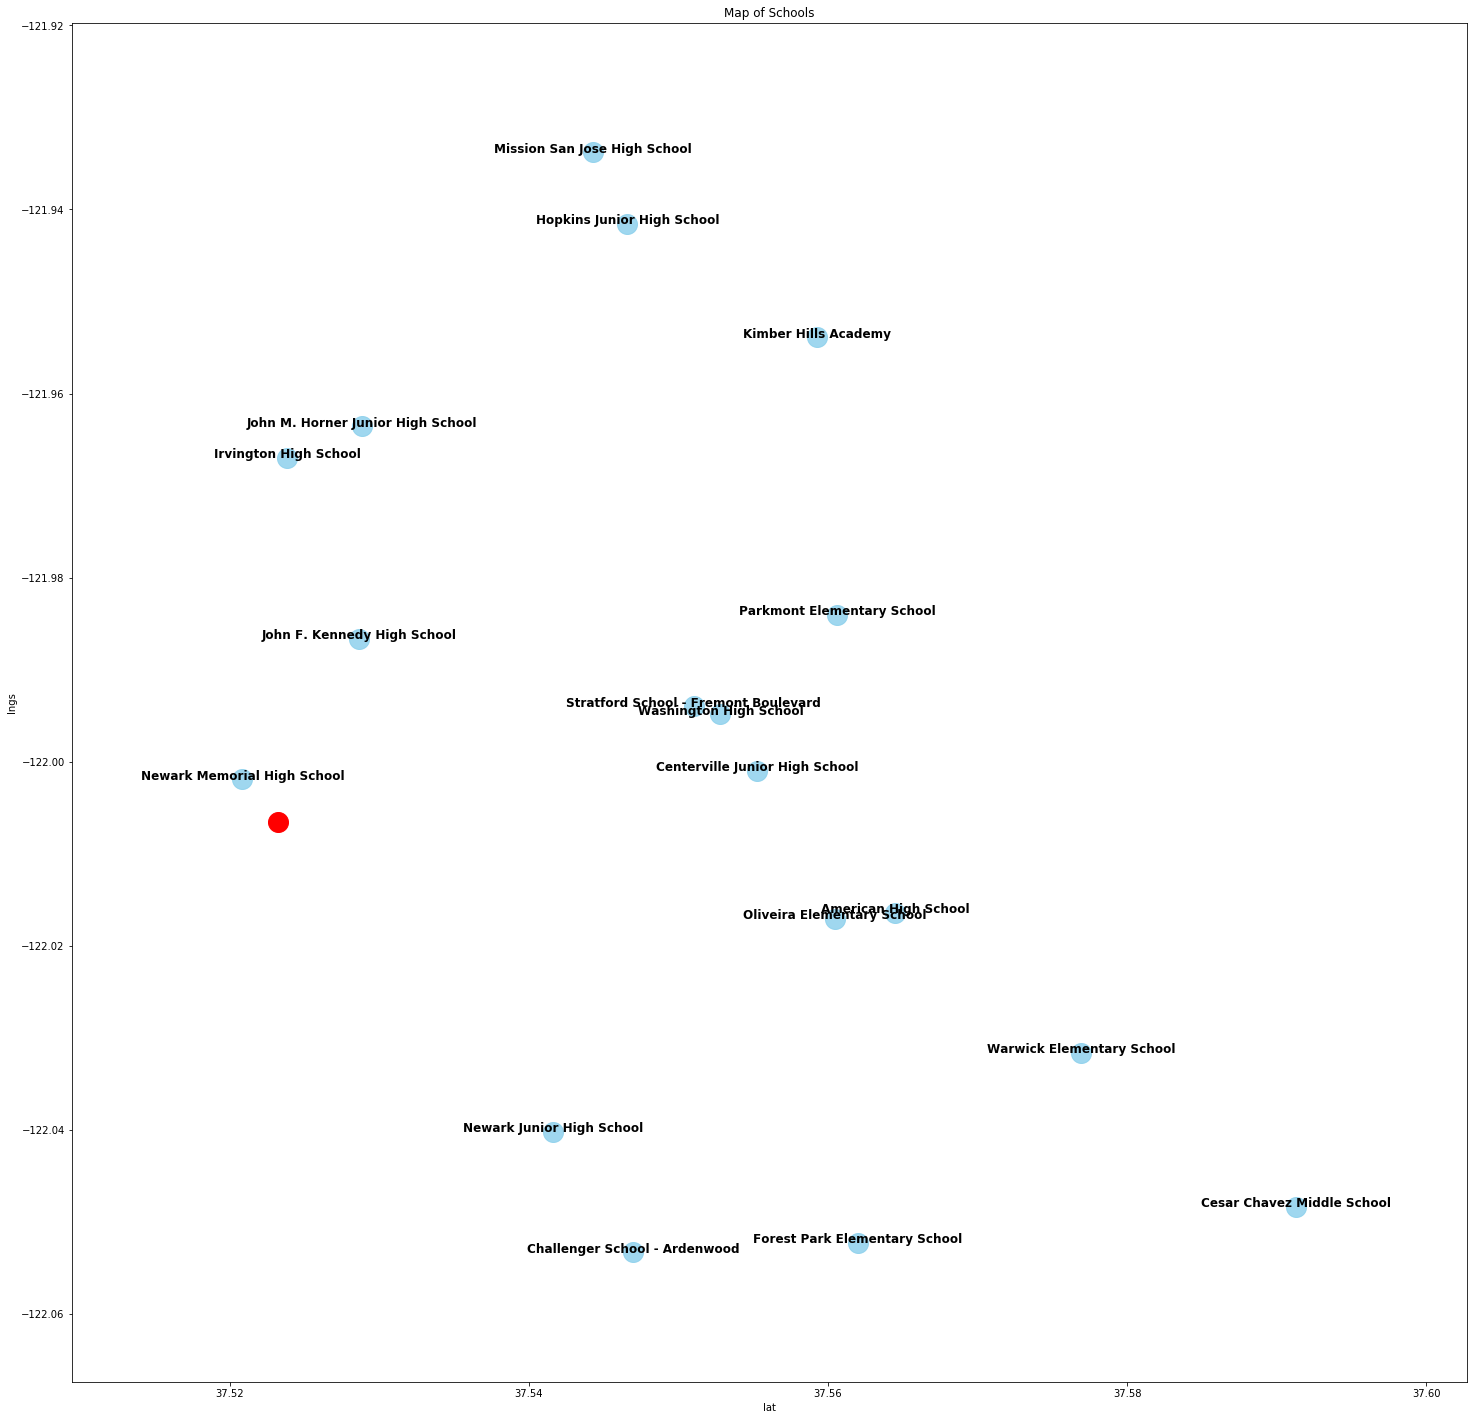

In [18]:
plt.figure(figsize = (25,25))
p1=sb.regplot(data=df, x="lat", y="lngs", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
p1.scatter(37.5232376,-122.0065377, c="r", s=400)
for line in range(0,df.shape[0]):
      p1.text(df.lat[line], df.lngs[line], df.school[line], horizontalalignment='center', size='large', color='black', weight="semibold" )
plt.title("Map of Schools");    

## Understanding School Demographics

Now that we have selected our schools. Lets understand the demmographics in these schools. To do this, I will be analyzing data from the California Department of Education. This dataset tells us the number of students in each grade by ethnicity, and gender 

In [16]:
enroll = pd.read_excel(r"C:\Users\Pavan\Desktop\enrollement.xlsx",)
enroll.head()

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1612596002273,Alameda,Oakland Unified,ACORN Woodland Elementary,6,F,0,2,2,0,...,0,0,0,0,0,0,0,0,8,0
1,1612596002273,Alameda,Oakland Unified,ACORN Woodland Elementary,7,M,1,1,1,1,...,0,0,0,0,0,0,0,0,4,0
2,1612596002273,Alameda,Oakland Unified,ACORN Woodland Elementary,0,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1612596002273,Alameda,Oakland Unified,ACORN Woodland Elementary,5,F,19,19,21,25,...,0,0,0,0,0,0,0,0,128,0
4,1612596002273,Alameda,Oakland Unified,ACORN Woodland Elementary,7,F,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [20]:
enroll.shape

(130220, 23)

As you can see, this data is for all schools in California. Thus, before, we begin to graph the data, we need to only select our schools of interest The following code does this: 

In [17]:
# I use regular expressions in the following two cells to manipulate the text data from the two tables
# I need them to teh structured data to be structured identically, so they can be compared.  
df["school"]=df["school"].str.replace(r'(School)',"")

In [18]:
df["school"]=df["school"].str.replace(r'(\s)',"")
enroll["SCHOOL"]=enroll["SCHOOL"].str.replace(r'(\s)',"")

In [19]:
#Put relevant school data in new dataframe
x=[]
for i in df["school"]: 
    x.append(enroll[enroll["SCHOOL"]==i])
new=pd.concat(x, ignore_index=True)
new.head()

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,6,M,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
1,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,4,F,0,0,0,0,...,0,0,0,3,4,3,7,0,17,0
2,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,1,F,0,0,0,0,...,0,0,0,1,0,1,0,0,2,0
3,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,9,F,0,0,0,0,...,0,0,0,4,5,2,2,0,13,0
4,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,7,F,0,0,0,0,...,0,0,0,12,10,13,12,0,47,0


In [65]:
new.groupby("SCHOOL").count()

,CDS_CODE,COUNTY,DISTRICT,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,GR_4,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
SCHOOL,,,,,,,,,,,,,,,,,,,,,
AmericanHigh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
CentervilleJuniorHigh,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
CesarChavezMiddle,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
ForestParkElementary,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
IrvingtonHigh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
JohnF.KennedyHigh,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
JohnM.HornerJuniorHigh,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
MissionSanJoseHigh,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
NewarkJuniorHigh,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


According to the CDE website explaining the data, there are 9 race gategories and two gender categories. Therefore, the maximum amount of rows per school should be 18. However, some schools like Washington High and JFK High have more. After further analysis, I discovered this is because schools in different districts can have the same name. To rectify this, I decided to select the schools only from Fremont Unified and Newark. 

In [20]:
y=[]
for i in ["Fremont Unified","Newark Unified"]: 
    y.append(new[new["DISTRICT"]==i])
cleaned=pd.concat(y, ignore_index=True)

In [25]:
cleaned.groupby("SCHOOL").count()

,CDS_CODE,COUNTY,DISTRICT,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,GR_4,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
SCHOOL,,,,,,,,,,,,,,,,,,,,,
AmericanHigh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
CentervilleJuniorHigh,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
ForestParkElementary,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
IrvingtonHigh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
JohnF.KennedyHigh,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
JohnM.HornerJuniorHigh,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
MissionSanJoseHigh,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
NewarkJuniorHigh,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
NewarkMemorialHigh,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


Now we have all the data for our target schools. However, we notice that the ethnicity column is an integer. For our visualization, it would be benificial to have the actual ethnicity listed instead. The following cells replaces the numbers with its appropriate ethnic category. 

In [21]:
race={0:"n/a", 1:"American Indian or Alaskan", 2:"Asian", 3:"Pacific Islander",4:"Filipino",5:"Hispanic",6:"African",7:"White",9:"Multiple"}

In [22]:
ethnic=[]
for i in range(len(cleaned["ETHNIC"])): 
    z=race[cleaned["ETHNIC"][i]]
    ethnic.append(z)

In [23]:
cleaned["ETHNIC"]=ethnic

In [29]:
cleaned.head()

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,African,M,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
1,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,Filipino,F,0,0,0,0,...,0,0,0,3,4,3,7,0,17,0
2,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,American Indian or Alaskan,F,0,0,0,0,...,0,0,0,1,0,1,0,0,2,0
3,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,Multiple,F,0,0,0,0,...,0,0,0,4,5,2,2,0,13,0
4,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,White,F,0,0,0,0,...,0,0,0,12,10,13,12,0,47,0


Since we are tryig to get a better overview of the distribution of students in this area, I thought it would be benificial to create a new column which states whether a school was a High school, Middle School, or Elementary School. This is helpful for further analysis. For instance, I can now answer questions, like "How many high school students are in this area?"

In [24]:
level=[]
high=cleaned["SCHOOL"].str.find("High")
junior=cleaned["SCHOOL"].str.find("JuniorHigh")
elementary=cleaned["SCHOOL"].str.find("Elementary")
for i in range(len(high)):
    if junior[i]!=-1: 
            level.append("junior")
    if junior[i] == -1: 
            if high[i]!=-1: 
                level.append("high")
            if high[i] == -1: 
                     if elementary[i]!=-1: 
                            level.append("elementary")
             
            
    

In [25]:
cleaned["level"]=level
cleaned.head()

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT,level
0,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,African,M,0,0,0,0,...,0,0,0,0,0,2,0,2,0,high
1,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,Filipino,F,0,0,0,0,...,0,0,3,4,3,7,0,17,0,high
2,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,American Indian or Alaskan,F,0,0,0,0,...,0,0,1,0,1,0,0,2,0,high
3,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,Multiple,F,0,0,0,0,...,0,0,4,5,2,2,0,13,0,high
4,1611760135244,Alameda,Fremont Unified,MissionSanJoseHigh,White,F,0,0,0,0,...,0,0,12,10,13,12,0,47,0,high


In [49]:
high_school= cleaned[cleaned["level"]=="high"]
middle_school= cleaned[cleaned["level"]=="junior"]
elementary_school= cleaned[cleaned["level"]=="elementary"]

(99, 24)
(47, 24)
(70, 24)


## Visualizations 
 
 Now, that the data is ready, I can begin analysis. 

### High Schools

There are 6 high schools in the area, with a total of 11,709 students.

In [50]:
np.unique(high_school["SCHOOL"])

array(['AmericanHigh', 'IrvingtonHigh', 'JohnF.KennedyHigh',
       'MissionSanJoseHigh', 'NewarkMemorialHigh', 'WashingtonHigh'],
      dtype=object)

In [51]:
sum(high_school["ENR_TOTAL"])

11709

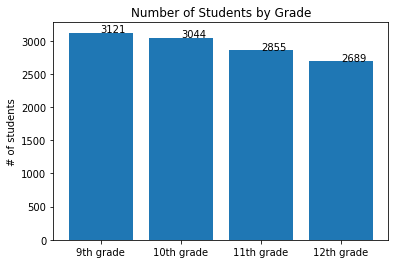

In [59]:
grades=[ sum(high_school["GR_9"]), sum(high_school["GR_10"]), sum(high_school["GR_11"]), sum(high_school["GR_12"])]
label=[ "9th grade", "10th grade","11th grade", "12th grade"]
plt.bar(x= label, height= grades)
plt.title("Number of Students by Grade");
plt.ylabel("# of students");
for i in range(len(grades)): 
    plt.text(x=label[i], y= grades[i]+10, s=grades[i])

This graph shows an interesting trend. It appears that the number of students enrolled decrease as the grades increase. I believe that this can be attributed to students dropping out of school, or moving to different districts. However, the decrease is very small, as 2689/3121 is approx 86%. This is positive retention is good, and is a sign of a healthy school system. 

In [62]:
hdemo=high_school.groupby(["ETHNIC","GENDER"]).sum().reset_index()


In [63]:
hdemo.head()

,ETHNIC,GENDER,CDS_CODE,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,African,F,9671140802775,0,0,0,0,0,0,0,0,0,0,33,41,41,29,0,144,0
1,African,M,9671140802775,0,0,0,0,0,0,0,0,0,0,41,51,34,37,0,163,0
2,American Indian or Alaskan,F,8059380668323,0,0,0,0,0,0,0,0,0,0,2,6,3,1,0,12,0
3,American Indian or Alaskan,M,8059380667531,0,0,0,0,0,0,0,0,0,0,2,5,0,3,0,10,0
4,Asian,F,9671140802775,0,0,0,0,0,0,0,0,0,0,860,809,756,719,0,3144,0


C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


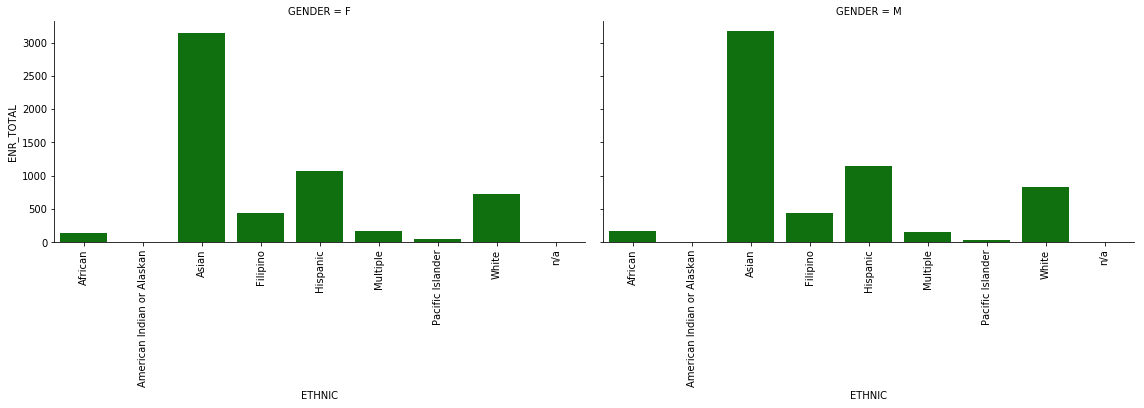

In [76]:
g=sb.FacetGrid(hdemo, col="GENDER", height=4, aspect=2)
g.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="g")
g.set_xticklabels(rotation=90);

This visualization shows the breakdown of high school students by race and ethnicity. As you can see, the graphs are identical, across genders. Also, it is clear that this is an Asian domintaed area, with a strong hispanic presence. 

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


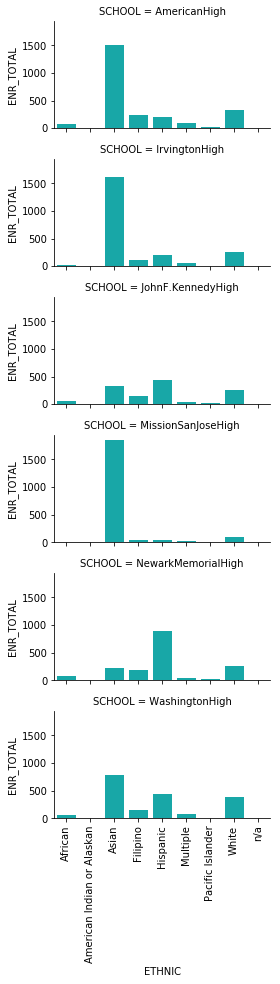

In [98]:
by_school=high_school.groupby(["SCHOOL","ETHNIC"]).sum().reset_index()
h=sb.FacetGrid(by_school, row="SCHOOL", height=2, aspect=2)
h.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="c")
plt.xticks(rotation=90);


Breaking down the ethnicity by school, shows more insights. It is clear that the schools, and thus neighborhoods surrounding the schools, are very different. The graph clearly shows that the Asian student population is largely centered around 3 schools- Mission San Jose, Irvington, and American High. The hispanic student population seems to be centered around Newark Memorial and JFK. 

### Middle School

There are 3106 middle school students in this area in 3 schools.

In [99]:
print(np.unique(middle_school["SCHOOL"]))
print(sum(middle_school["ENR_TOTAL"]))

['CentervilleJuniorHigh' 'JohnM.HornerJuniorHigh' 'NewarkJuniorHigh']
3106


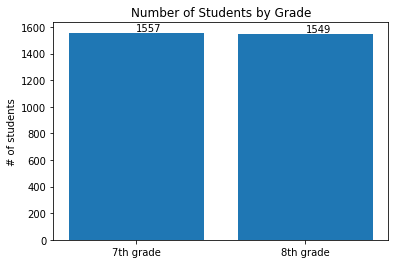

In [101]:
grades=[ sum(middle_school["GR_7"]), sum(middle_school["GR_8"])]
label=[ "7th grade", "8th grade"]
plt.bar(x= label, height= grades)
plt.title("Number of Students by Grade");
plt.ylabel("# of students");
for i in range(len(grades)): 
    plt.text(x=label[i], y= grades[i]+10, s=grades[i])

As you can see the number of students for 7th and 8th grade are very similiar, which could indicate that students finish middle school. 

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


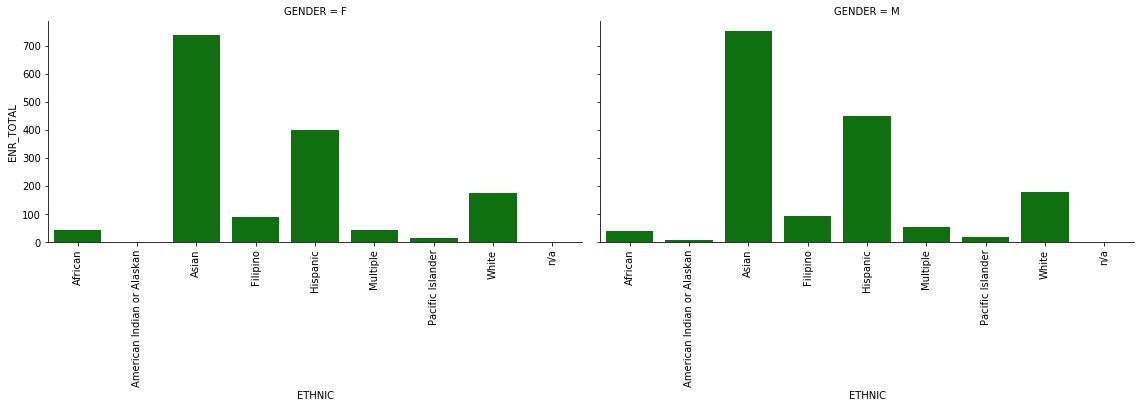

In [102]:
mdemo=middle_school.groupby(["ETHNIC","GENDER"]).sum().reset_index()
g=sb.FacetGrid(mdemo, col="GENDER", height=4, aspect=2)
g.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="g")
g.set_xticklabels(rotation=90);

We see the demographic breakdown pattern matches the high school breakdown. 

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


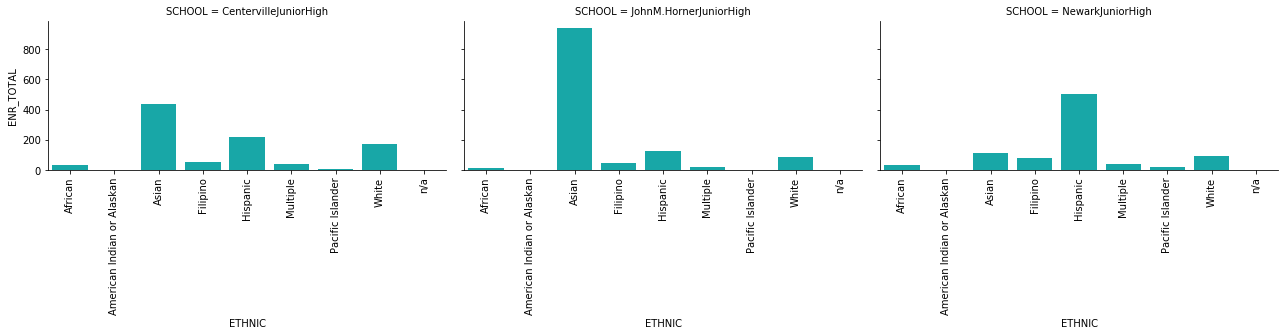

In [107]:
by_mschool=middle_school.groupby(["SCHOOL","ETHNIC"]).sum().reset_index()
h=sb.FacetGrid(by_mschool, col="SCHOOL", height=3, aspect=2)
h.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="c")
h.set_xticklabels(rotation=90);


This graph confirms the notion that these three middle schools all feed into Washington, Irvington, and Newark Memorial, respectively, since the demographic distribution is identitical. 

### Elementary Schools

There are 3693 students in 4 elementary schools. 

In [108]:
print(np.unique(elementary_school["SCHOOL"]))
print(sum(elementary_school["ENR_TOTAL"]))

['ForestParkElementary' 'OliveiraElementary' 'ParkmontElementary'
 'WarwickElementary']
3693


In [109]:
elementary_school.head()

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT,level
62,1611766111330,Alameda,Fremont Unified,ForestParkElementary,n/a,M,2,0,3,0,...,0,0,0,0,0,0,0,5,0,elementary
63,1611766111330,Alameda,Fremont Unified,ForestParkElementary,n/a,F,0,0,1,0,...,0,0,0,0,0,0,0,1,0,elementary
64,1611766111330,Alameda,Fremont Unified,ForestParkElementary,Hispanic,F,2,2,1,3,...,0,0,0,0,0,0,0,17,0,elementary
65,1611766111330,Alameda,Fremont Unified,ForestParkElementary,Pacific Islander,F,1,1,1,0,...,0,0,0,0,0,0,0,4,0,elementary
66,1611766111330,Alameda,Fremont Unified,ForestParkElementary,African,F,0,2,0,1,...,0,0,0,0,0,0,0,5,0,elementary


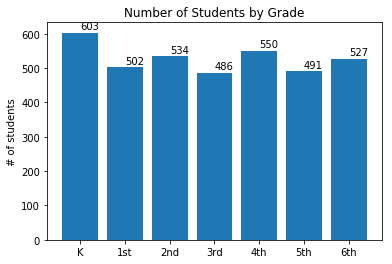

In [110]:
grades=[sum(elementary_school["KDGN"]),sum(elementary_school["GR_1"]),sum(elementary_school["GR_2"]),sum(elementary_school["GR_3"]), sum(elementary_school["GR_4"]), sum(elementary_school["GR_5"]),sum(elementary_school["GR_6"])]
label=[ "K","1st","2nd","3rd","4th","5th","6th"]
plt.bar(x= label, height= grades)
plt.title("Number of Students by Grade");
plt.ylabel("# of students");
for i in range(len(grades)): 
    plt.text(x=label[i], y= grades[i]+10, s=grades[i])

We see that the number of students fluctates, but is about 500 for 1st to 6th grade. 

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


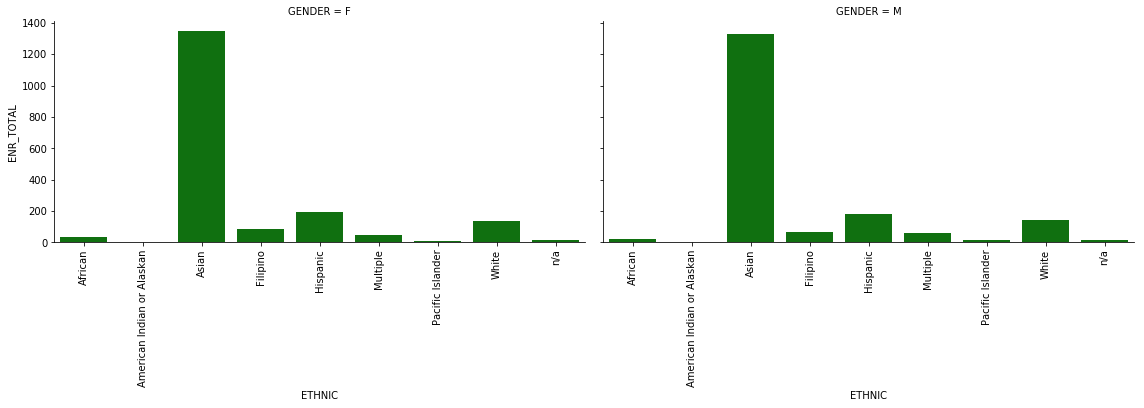

In [111]:
edemo=elementary_school.groupby(["ETHNIC","GENDER"]).sum().reset_index()
g=sb.FacetGrid(edemo, col="GENDER", height=4, aspect=2)
g.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="g")
g.set_xticklabels(rotation=90);

Like, the previous breakdowns, there is a large Asian presence. The fact that this same pattern,a dominant asian presence, has persisisted throughout all levels clearly shows that the increase in Asian poulation in this area is a lasting phenomena that will not decrease.  

C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


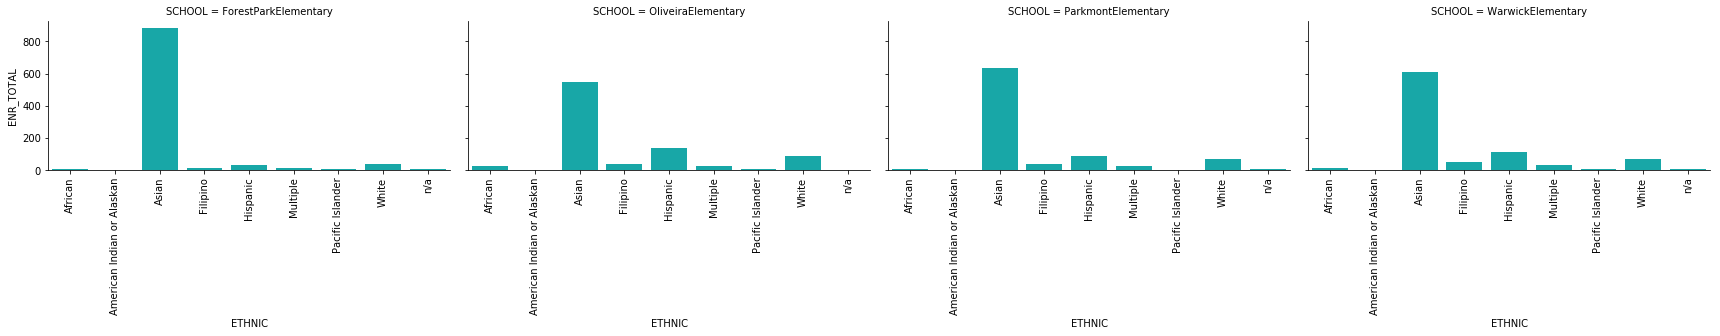

In [114]:
by_eschool=elementary_school.groupby(["SCHOOL","ETHNIC"]).sum().reset_index()
h=sb.FacetGrid(by_eschool, col="SCHOOL", height=3, aspect=2)
h.map(sb.barplot,"ETHNIC", "ENR_TOTAL", color="c")
h.set_xticklabels(rotation=90);


A heavy Asian presence can be noticed in these schools. 

### Key Take Aways for Marketing Campaign
There are two key take ways from this data: 
1. The Ad Picture: In our ad, the picture is the main hook that will get people to stop scrolling and click. Therefore, it is important that people identify with the people in the picture, and I believe ethnicity  will play an important role in this process for the ad viewers.  From this data, it is clear that the student should be Asian. This not only reaches the largest amount of people but also  favors the tutoring service whose teachers are Asian. Furthermore, regarding the exact content of the picture, I believe that we should not use the current stock photo, and instead pose real students and teachers in a more eye-catchy, happy pose.
2. How to Target: Facebook does not allow targeting specifically based on ethnicity.Since I believe that ethnicity plays an important role in building connection with the viewer which will result in clicks, we need to indirectly do this. Specifically, we need a way to narrow our ad to Asian dominated neighborhoods. The demographic analysis that I performed and the map lay the blueprint for this. From the high school analysis, we discovered that the Asian community is concentrated near Mission San Jose High, American High, and Irvington. However, high schools tend to be bigger and many neighborhoods feed in to them. To get a more nuanced  understanding then, we should turn our attention to the lower schools which are linked to the high school. By analyzing the demographics of these linkages, we can better understand where the Asian population is coming from. Once this is done, we can then search for stores and community centers around the area, to understand the Asian influence in the Area. For example, we notice that there is a large Asian population in Irvington High.But Irvington High School covers a large area. Analysis of an associated middle school, shows that lots of Asians are coming from Horner Jr. High.  Further analysis of the surrounding Horner Jr. High  area should reveal events/ community centers with can help us undertsand in detail where the Asian community congegrates, which will allow us to effectivly reach this demographic. This requires more analysis which should be done in another notebook.  


## Test Score Analysis 

Now that we have have considered the picture, we should turn to the banner. Also, in this section, I will be analyzing more segmentations for the ad campaign. 

### Banner Idea

For the Banner, I want to customize it towards the Balanced exam. The exam tests in 4 English area and 3 math areas: 
1. English: Reading, Writing, Listening and communication, and Research/Inquiry. 
2. Math: Concepts and Procedures, Problem Solving/Modeling and Data Analysis, Communicating Reasoning. 
As stated previously, there will be two seperate ads runing during this campaign- a Math ad, and an English ad: 
The banner of the both ads should state. " Improve your(Area) ability today!."

But, we need to find out what the Area should be in the ad. So, to answer this, I will analyze the results of recent student scores, and see where the most students are lacking. Based on  our previous conclusions, I will focus on providing written analysis of the largely Asian school- Irvington, American, Mission San Jose. Even though I have graphed all schools for future reference, I believe that since the schools are linked, creating banner content from the high school data is sufficient as student weaknesses should persist throughout all the schools. 

Data was provided in three seperate tables, so before I begin analysis I have to join them. The scores table represent student results. The subgroup and schools table help us translate the numeral subgroup id and school id , into written form for clearer analysis. 

In [26]:
scores= pd.read_csv(r"C:\Users\Pavan\Desktop\fusd.txt",)
scores.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.45,49.02,40.56,10.42,46.02,47.67,6.32,50.23,38.94,10.84
1,1,61176,0,NaN,2019,3,B,9347,9342,3,...,12.01,45.88,42.24,11.87,43.45,49.34,7.21,49.31,37.95,12.75
2,1,61176,0,NaN,2019,4,B,8913,8909,3,...,8.79,52.37,38.75,8.87,48.76,45.88,5.37,51.21,40.00,8.79
3,1,61176,0,NaN,2019,6,B,16774,16769,3,...,6.78,53.20,40.18,6.62,50.15,45.79,4.06,54.88,37.91,7.21
4,1,61176,0,NaN,2019,7,B,2500,2500,3,...,1.69,68.26,30.06,1.69,66.01,33.15,0.84,66.01,31.74,2.25


In [131]:
scores.dtypes

County Code                            int64
District Code                          int64
School Code                            int64
Filler                               float64
Test Year                              int64
Subgroup ID                            int64
Test Type                             object
Total Tested At Entity Level          object
Total Tested with Scores              object
Grade                                  int64
Test Id                                int64
CAASPP Reported Enrollment            object
Students Tested                       object
Mean Scale Score                      object
Percentage Standard Exceeded          object
Percentage Standard Met               object
Percentage Standard Met and Above     object
Percentage Standard Nearly Met        object
Percentage Standard Not Met           object
Students with Scores                  object
Area 1 Percentage Above Standard      object
Area 1 Percentage Near Standard       object
Area 1 Per

In [27]:
subgroups= pd.read_csv(r"C:\Users\Pavan\Desktop\Subgroups.txt",)
subgroups.head()

,Demographic ID,Demographic ID Num,Demographic Name,Student Group
0,1,1,All Students,All Students
1,3,3,Male,Gender
2,4,4,Female,Gender
3,6,6,Fluent English proficient and English only,English-Language Fluency
4,7,7,Initial fluent English proficient (IFEP),English-Language Fluency


In [28]:
schools= pd.read_csv(r"C:\Users\Pavan\Desktop\schools.txt",encoding = "ISO-8859-1")
schools.head()

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,37,68098,133991,NaN,2019,9,San Diego,Epiphany Prep Charter,Epiphany Prep Charter,92025
1,37,68098,3768098,NaN,2019,7,San Diego,Escondido Union,Escondido Union District Level Program,92029
2,37,68098,6038178,NaN,2019,7,San Diego,Escondido Union,Central Elementary,92025
3,37,68098,6038186,NaN,2019,7,San Diego,Escondido Union,Conway Elementary,92027
4,37,68098,6038194,NaN,2019,7,San Diego,Escondido Union,Del Dios Academy of Arts and Sciences,92025


In [29]:
joined=scores.merge(schools, on= "School Code", how="inner" )
joined.head()

,County Code_x,District Code_x,School Code,Filler_x,Test Year_x,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Area 4 Percentage Below Standard,County Code_y,District Code_y,Filler_y,Test Year_y,Type Id,County Name,District Name,School Name,Zip Code
0,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.84,37,68106,NaN,2019,6,San Diego,Escondido Union High,NaN,
1,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.84,37,68114,NaN,2019,6,San Diego,Fallbrook Union Elementary,NaN,
2,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.84,37,68122,NaN,2019,6,San Diego,Fallbrook Union High,NaN,
3,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.84,37,68130,NaN,2019,6,San Diego,Grossmont Union High,NaN,
4,1,61176,0,NaN,2019,1,B,18260,18251,3,...,10.84,37,68155,NaN,2019,6,San Diego,Jamul-Dulzura Union Elementary,NaN,


In [125]:
merged=joined.merge(subgroups, left_on="Subgroup ID", right_on= "Demographic ID")
merged.head()


,County Code_x,District Code_x,School Code,Filler_x,Test Year_x,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Test Year_y,Type Id,County Name,District Name,School Name,Zip Code,Demographic ID,Demographic ID Num,Demographic Name,Student Group
0,1,61176,0,NaN,2019,1,B,18260,18251,3,...,2019,6,San Diego,Escondido Union High,NaN,,1,1,All Students,All Students
1,1,61176,0,NaN,2019,1,B,18260,18251,3,...,2019,6,San Diego,Fallbrook Union Elementary,NaN,,1,1,All Students,All Students
2,1,61176,0,NaN,2019,1,B,18260,18251,3,...,2019,6,San Diego,Fallbrook Union High,NaN,,1,1,All Students,All Students
3,1,61176,0,NaN,2019,1,B,18260,18251,3,...,2019,6,San Diego,Grossmont Union High,NaN,,1,1,All Students,All Students
4,1,61176,0,NaN,2019,1,B,18260,18251,3,...,2019,6,San Diego,Jamul-Dulzura Union Elementary,NaN,,1,1,All Students,All Students


In [137]:
merged.dtypes

County Code_x                          int64
District Code_x                        int64
School Code                            int64
Filler_x                             float64
Test Year_x                            int64
Subgroup ID                            int64
Test Type                             object
Total Tested At Entity Level          object
Total Tested with Scores              object
Grade                                  int64
Test Id                                int64
CAASPP Reported Enrollment            object
Students Tested                       object
Mean Scale Score                      object
Percentage Standard Exceeded          object
Percentage Standard Met               object
Percentage Standard Met and Above     object
Percentage Standard Nearly Met        object
Percentage Standard Not Met           object
Students with Scores                  object
Area 1 Percentage Above Standard      object
Area 1 Percentage Near Standard       object
Area 1 Per

In [126]:
merged=merged[merged["School Code"]!=0]
merged=merged.drop(["County Code_x","District Code_x","Filler_x","Test Year_x","Test Type","County Code_y","District Code_y","Filler_y","County Name","Demographic ID Num","Zip Code"], axis=1)


Before, we graph the data, we must preprocess it. The first step is to select the schools we are interested in like we did for the other table. 

In [127]:
n=np.unique(cleaned["SCHOOL"])
merged=merged.reset_index().drop("index", axis=1)
merged["School Name"]=merged["School Name"].str.replace(r'(\s)',"")
drop=[]
for i in range(len(merged["School Name"])): 
    if not merged["School Name"][i] in n: 
        drop.append(i)

In [128]:
merged=merged.drop(drop)

Some missing values were represented by * instead of Nans. We need to replace the * with Nans and drop them. 

In [44]:
merged["Area 4 Percentage Above Standard"].values

array(['68.09', '68.09', '0.00', ..., '*', '*', '*'], dtype=object)

In [129]:
merged=merged.replace("*", np.nan)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 0 to 14181
Data columns (total 34 columns):
School Code                          3136 non-null int64
Subgroup ID                          3136 non-null int64
Total Tested At Entity Level         2742 non-null object
Total Tested with Scores             2742 non-null object
Grade                                3136 non-null int64
Test Id                              3136 non-null int64
CAASPP Reported Enrollment           2490 non-null object
Students Tested                      2490 non-null object
Mean Scale Score                     1252 non-null object
Percentage Standard Exceeded         1981 non-null object
Percentage Standard Met              1981 non-null object
Percentage Standard Met and Above    1981 non-null object
Percentage Standard Nearly Met       1981 non-null object
Percentage Standard Not Met          1981 non-null object
Students with Scores                 2490 non-null object
Area 1 Percentage Above St

In [131]:
merged=merged.dropna()
merged=merged.reset_index().drop("index", axis=1)
merged.shape

(1252, 34)

I am not interested in every category. There are a few categories, I am concerned with which represents how I would further segement this ad campaign. I am interested in not economically disadvantaged ethnicity, english learner, and parent education.  

In [36]:
interested=[220,221,222,223,224,225,226,227,160,120,142,170,190,90,91,92,93,94,121]

In [132]:
no=[]
for i in range(len(merged["Demographic ID"])): 
    if not merged["Demographic ID"][i] in interested:
        no.append(i)
merged=merged.drop(no)        

In [133]:
# Convert categorical variables to ints
to_int=["Total Tested At Entity Level","Total Tested with Scores","CAASPP Reported Enrollment","Students Tested","Mean Scale Score",
       "Percentage Standard Exceeded","Percentage Standard Met","Percentage Standard Met and Above","Percentage Standard Nearly Met",
       "Percentage Standard Not Met","Students with Scores","Area 1 Percentage Above Standard","Area 1 Percentage Near Standard",
       "Area 1 Percentage Below Standard","Area 2 Percentage Above Standard","Area 2 Percentage Near Standard","Area 2 Percentage Below Standard",
       "Area 3 Percentage Above Standard","Area 3 Percentage Near Standard","Area 3 Percentage Below Standard","Area 4 Percentage Above Standard",
       "Area 4 Percentage Near Standard","Area 4 Percentage Below Standard"]
for i in to_int: 
    merged[i]= merged[i].astype(float)
merged.dtypes

School Code                            int64
Subgroup ID                            int64
Total Tested At Entity Level         float64
Total Tested with Scores             float64
Grade                                  int64
Test Id                                int64
CAASPP Reported Enrollment           float64
Students Tested                      float64
Mean Scale Score                     float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                 float64
Area 1 Percentage Above Standard     float64
Area 1 Percentage Near Standard      float64
Area 1 Percentage Below Standard     float64
Area 2 Percentage Above Standard     float64
Area 2 Percentage Near Standard      float64
Area 2 Percentage Below Standard     float64
Area 3 Percentage Above Standard     float64
Area 3 Per

In order to get the data in appropriate form for graphing, I need to unpivot the Area columns. The following code does this. 

In [39]:
to_unpivot=merged.columns[15:27].values
same=[]
for i in merged.columns:
        if not i in to_unpivot: 
            same.append(i)
                
    

In [70]:
to_unpivot

array(['Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard'], dtype=object)

In [40]:
merged=pd.melt(merged, id_vars= same, value_vars= to_unpivot,
        var_name='Area', value_name='percentage')
merged.head().loc[:,"Area":]

,Area,percentage
0,Area 1 Percentage Above Standard,20.00
1,Area 1 Percentage Above Standard,13.33
2,Area 1 Percentage Above Standard,30.00
3,Area 1 Percentage Above Standard,10.00
4,Area 1 Percentage Above Standard,20.51


In [41]:
races=["Black or African American","American Indian or Alaska Native","Asian","Filipino","Hispanic or Latino","Native Hawaiian or Pacific Islander",
 "White","Two or more races"]

The purpose of the next graph is to ensure that the same demographic patterns that we observed in the previous section is apparent for this data. It is clear that they follow the same pattern

In [42]:
bo=merged.groupby(["School Name","Demographic Name"]).sum().reset_index()
m=[]
for i in range(len(bo)): 
    if not bo["Demographic Name"][i] in races: 
        m.append(i)
bo=bo.drop(m)
bo.head()

,School Name,Demographic Name,School Code,Subgroup ID,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,...,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Test Year_y,Type Id,Demographic ID
0,AmericanHigh,Asian,260124,444,563.0,563.0,22,3,566.0,563.0,...,7.45,133.19,61.12,5.69,78.65,17.79,3.56,4038,14,444
5,AmericanHigh,Filipino,260124,446,98.0,98.0,22,3,98.0,98.0,...,12.24,91.83,102.04,6.12,65.31,34.69,0.00,4038,14,446
8,AmericanHigh,Hispanic or Latino,260124,448,62.0,62.0,22,3,64.0,62.0,...,39.17,57.71,103.13,39.17,50.00,40.63,9.38,4038,14,448
10,AmericanHigh,Two or more races,260124,454,40.0,40.0,22,3,40.0,40.0,...,5.00,110.00,90.00,0.00,65.00,35.00,0.00,4038,14,454
11,AmericanHigh,White,260124,452,88.0,88.0,22,3,96.0,88.0,...,25.00,77.27,113.63,9.10,52.27,43.18,4.55,4038,14,452


C:\Users\Pavan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


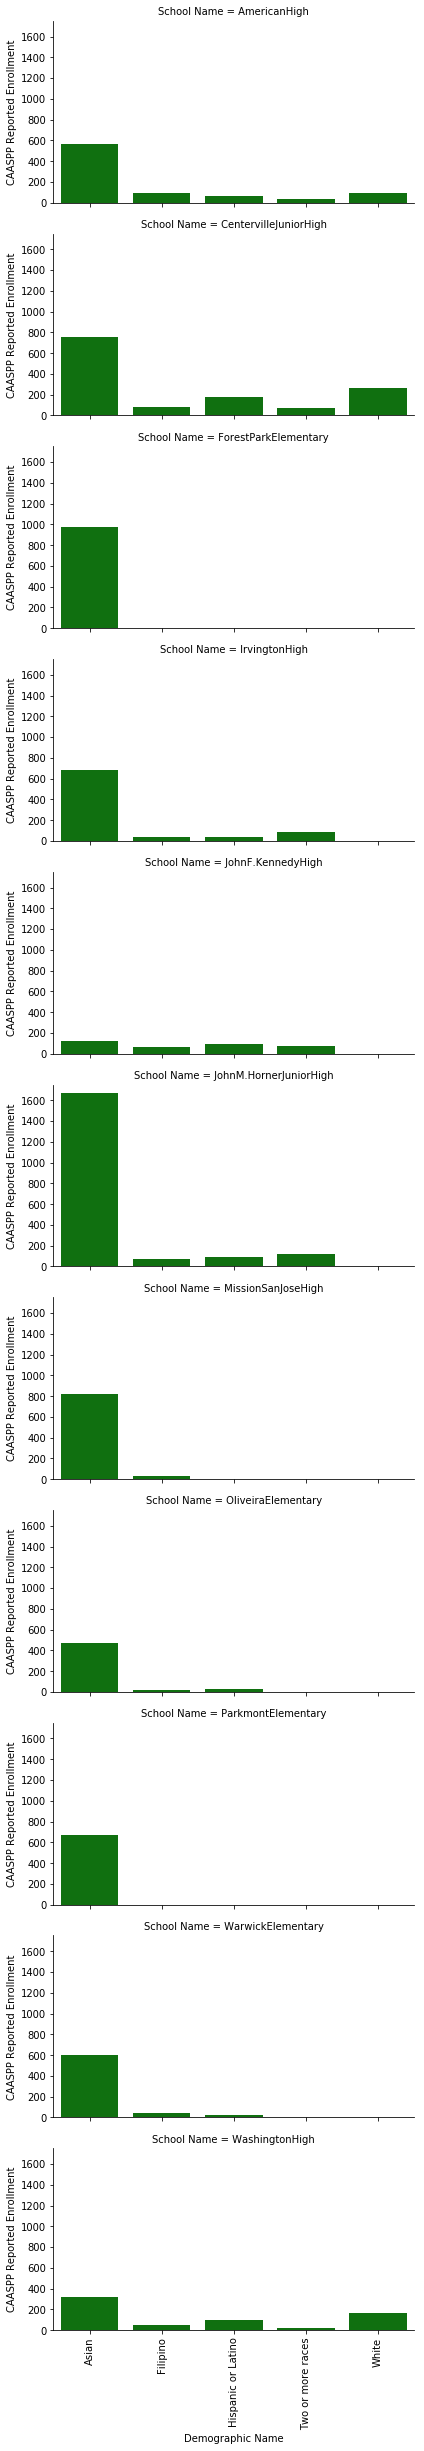

In [80]:
g=sb.FacetGrid(bo, row="School Name", height=3, aspect=2)
g.map(sb.barplot,"Demographic Name", "CAASPP Reported Enrollment", color="g")
plt.xticks(rotation=90);

### Asian Test Performance

Targeting Asians is very a very important segmentation strategy for my campaign, so lets see how they performed.

In [58]:
math= merged[merged["Test Id"]==2]
eng=merged[merged["Test Id"]==1]

In [138]:
o=merged[merged["Demographic ID"]==222]["CAASPP Reported Enrollment"].sum()
print("The Total number of students who are Asian are "+str(o))

The Total number of students who are Asian are 7659.0


In [74]:
masian=math[(math["Demographic Name"]== "Asian") & (math["Student Group"]== "Ethnicity for Not Economically Disadvantaged")]
easian=eng[(eng["Demographic Name"]== "Asian") & (eng["Student Group"]== "Ethnicity for Not Economically Disadvantaged")]

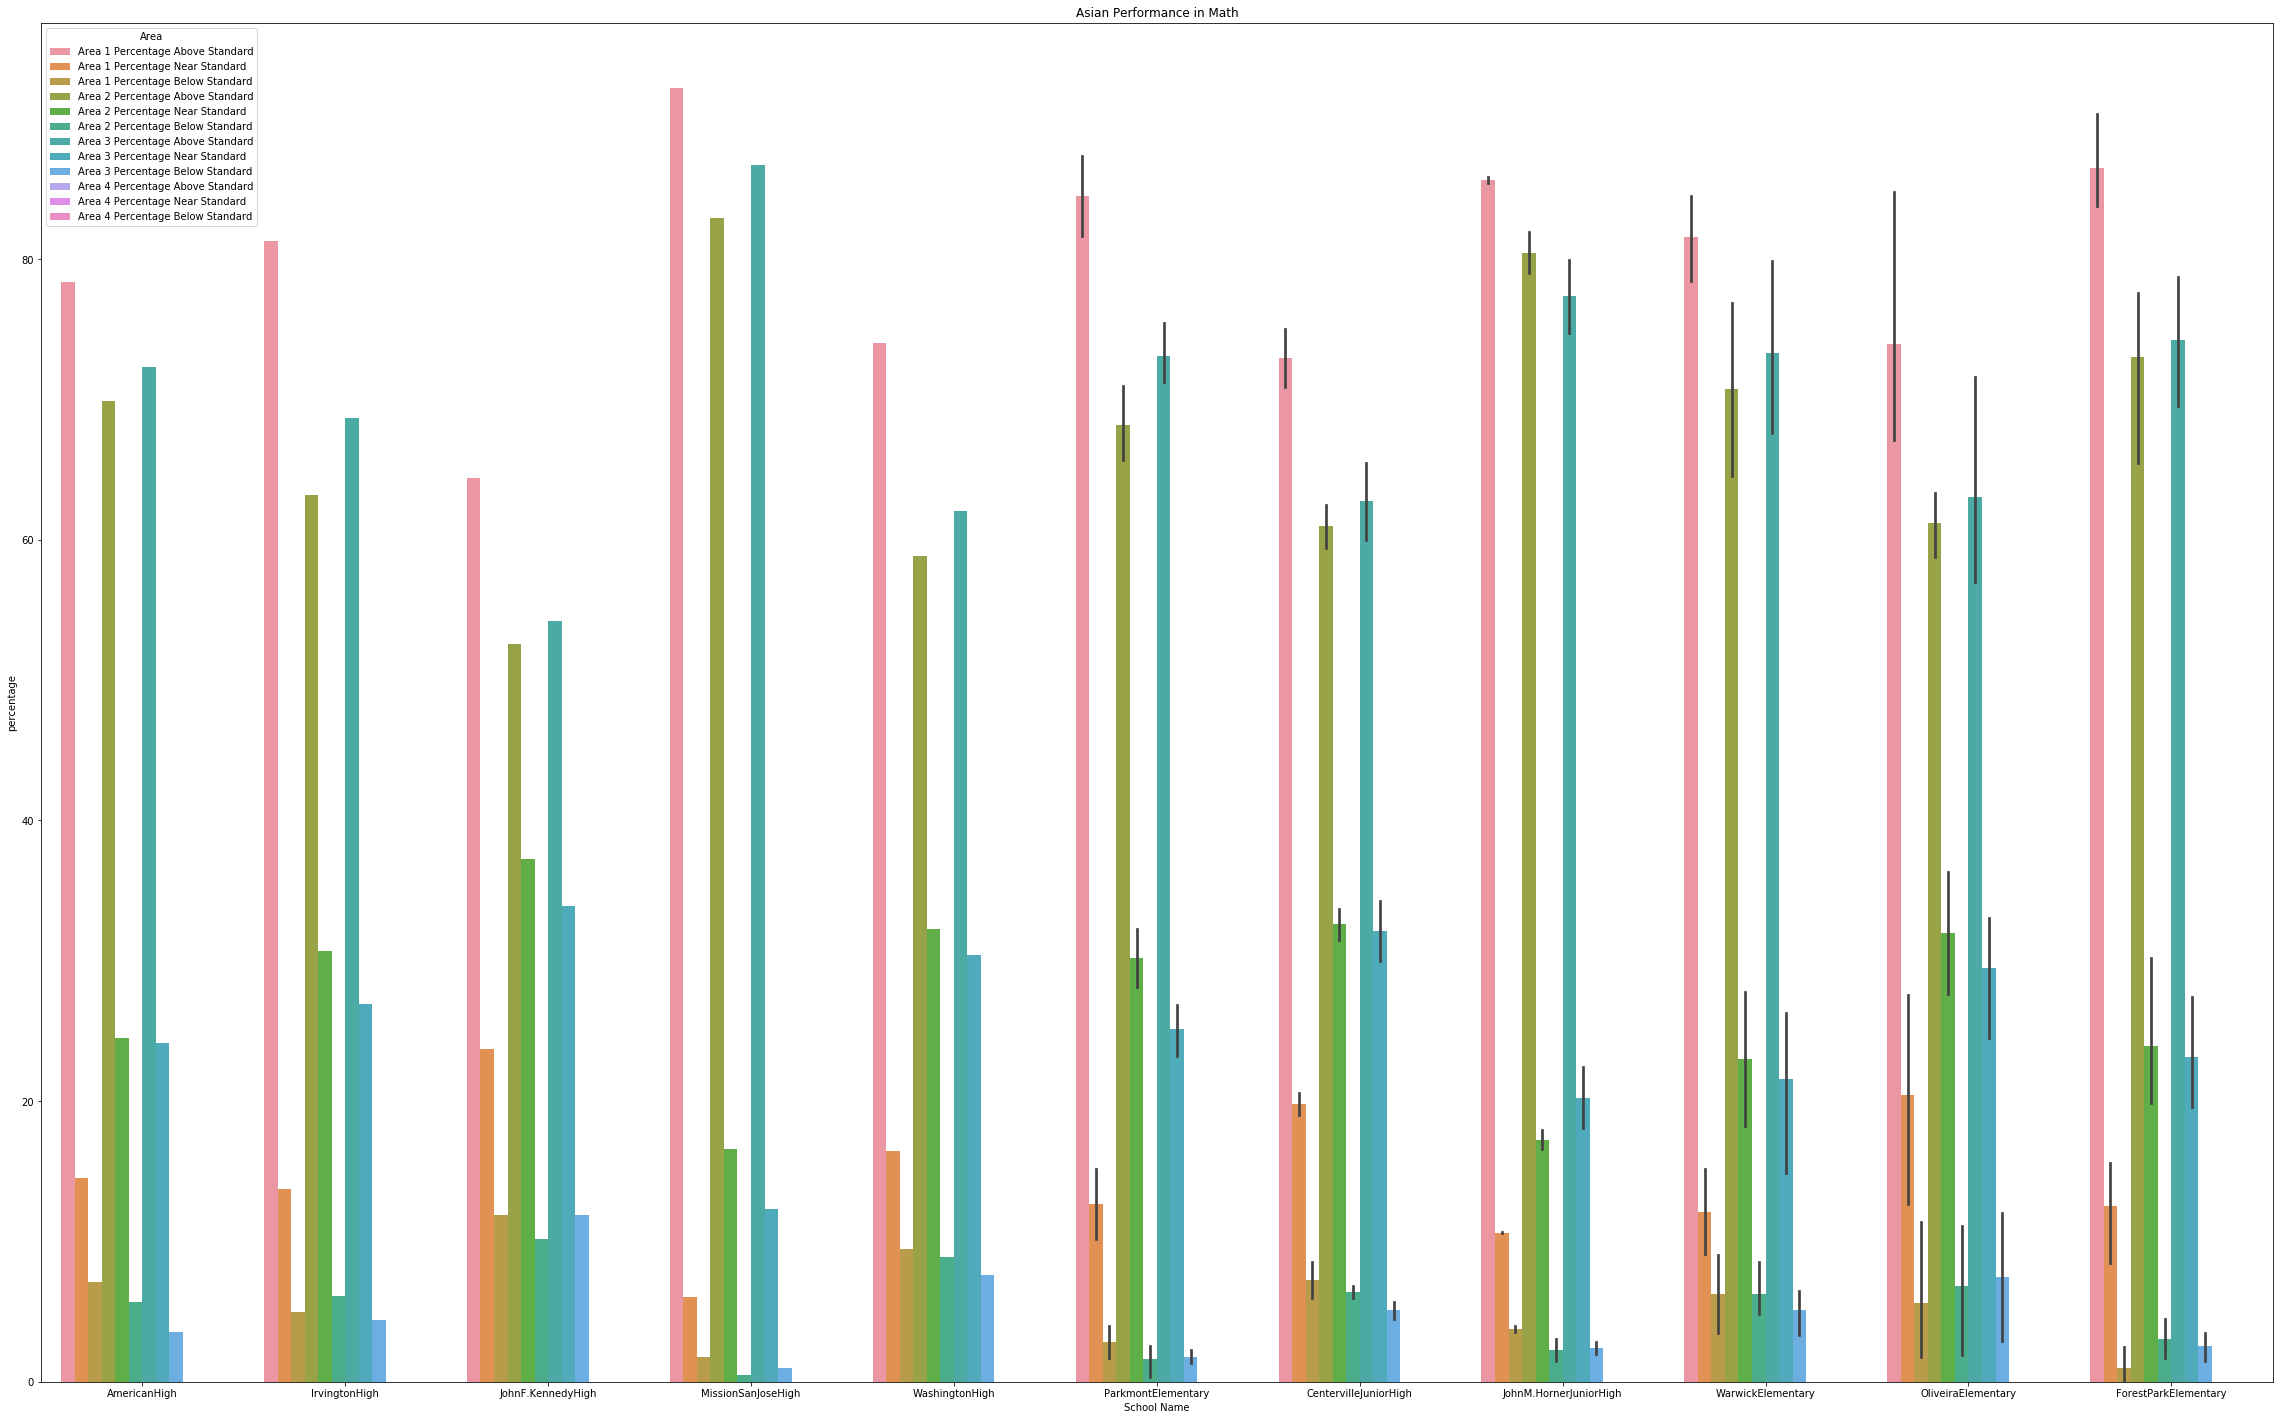

In [80]:
plt.figure(figsize=(40,25));
sb.barplot(x="School Name", y="percentage", hue="Area", data= masian)
plt.title("Asian Performance in Math");

1. For Asians in American High: I believe the banner should highlight Area two which is Problem Solving/ Data Analysis. This is because the percentage of students who scored who socred above Standard on here is the lowest. Also, the highets percentage of students only performed near expectations when compared to the other areas. 
2. For Asians in Irvington: We notice that Area 2 was a huge struggle for these students with a reletivly high percentage of meets expectations and low above expectations. 
3. For Asians in Mission San Jose: Area 2 for the same reasons as above. 

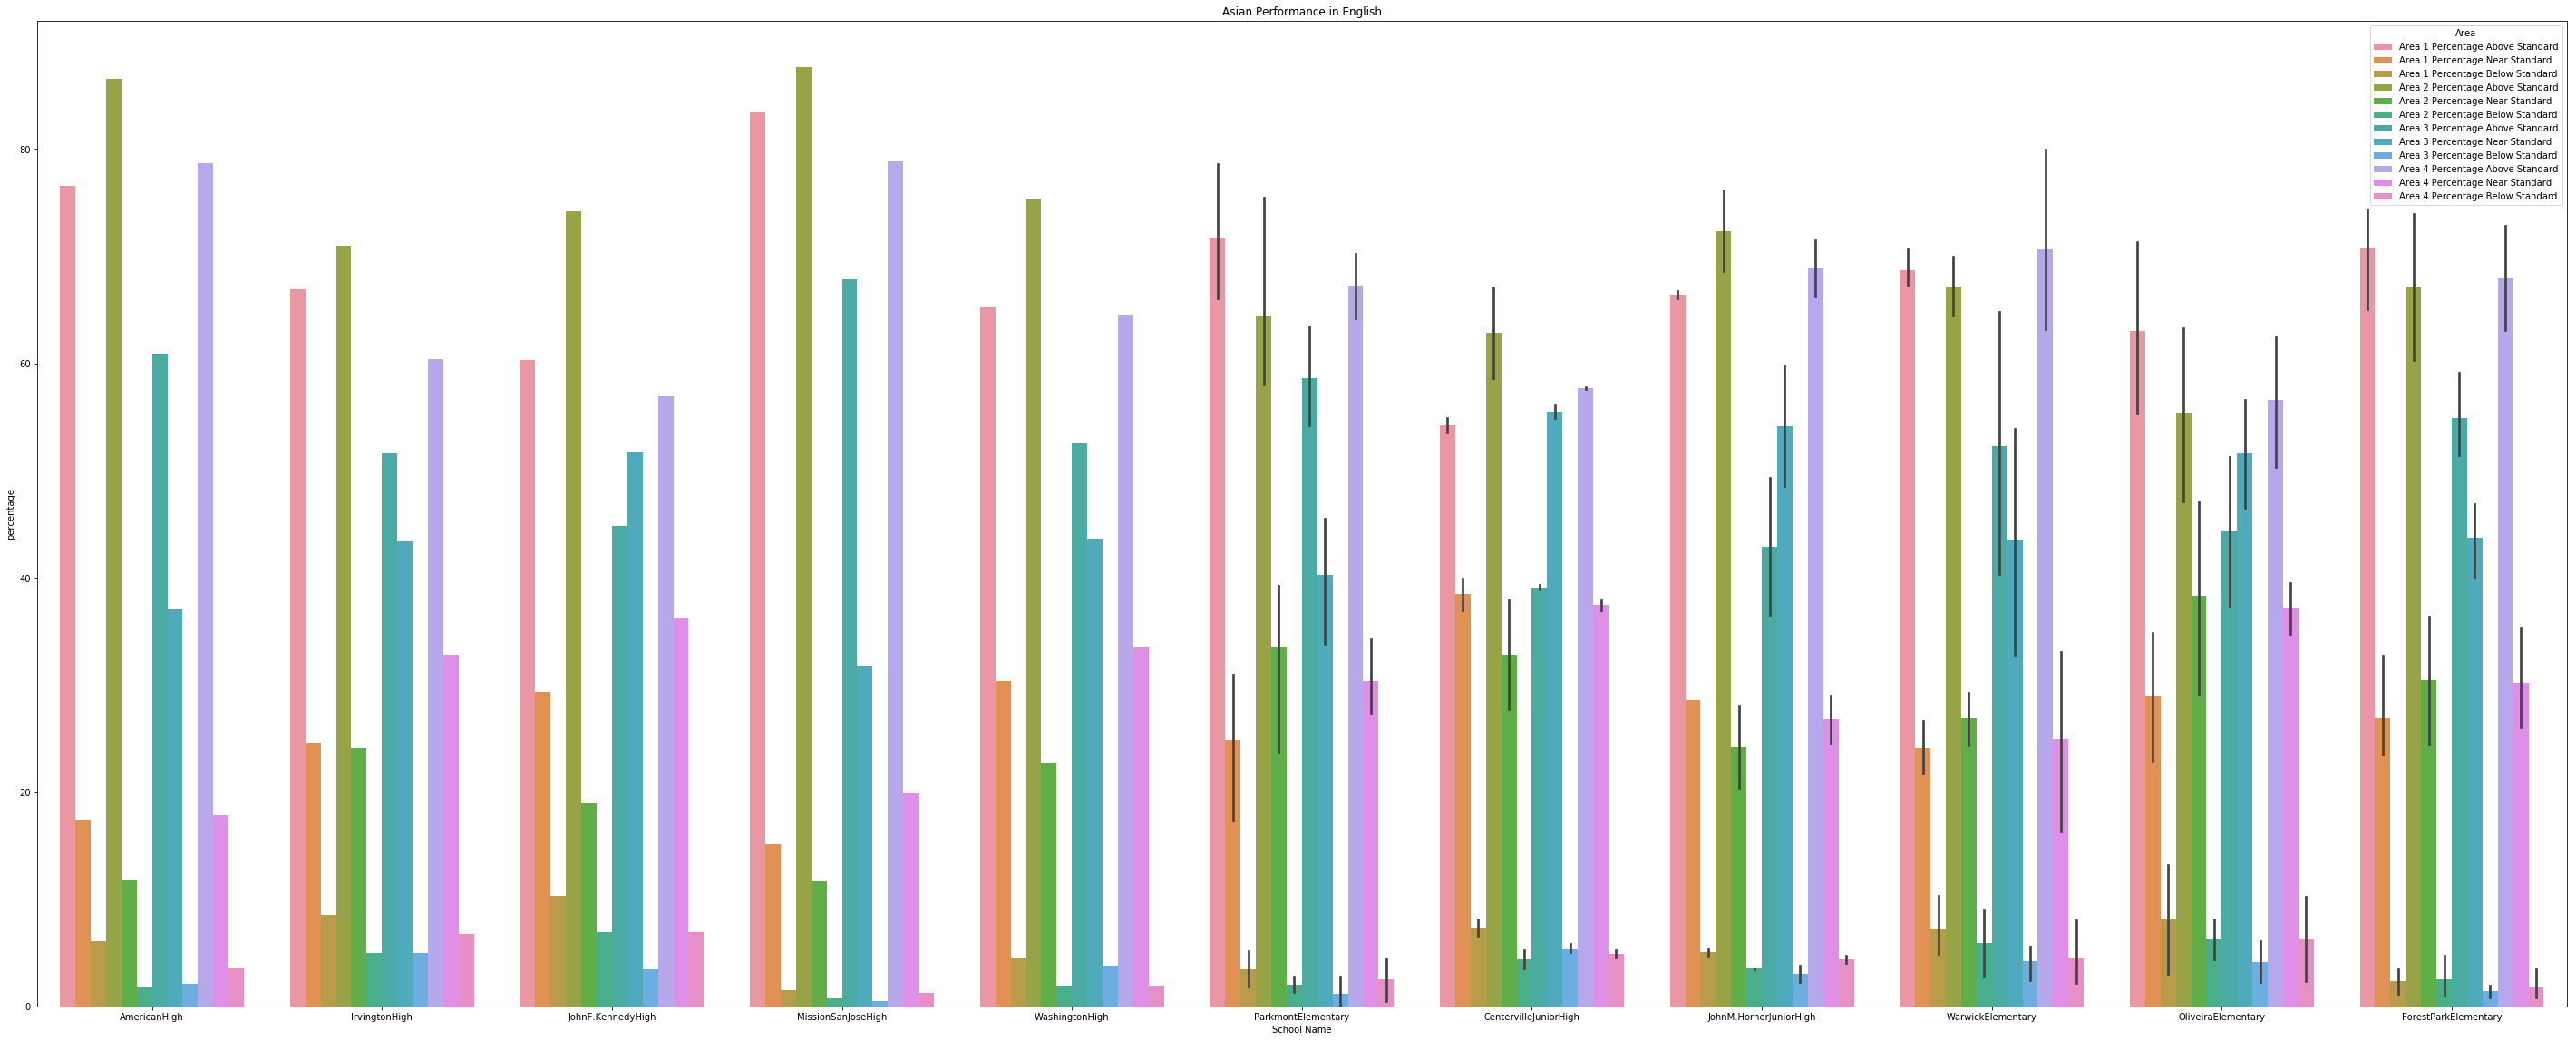

In [82]:
plt.figure(figsize=(50,20));
sb.barplot(x="School Name", y="percentage", hue="Area", data= easian)
plt.title("Asian Performance in English");

1. Asians in American: Area 3, which is listening(communication skills) should be focused on in the banner. Ths is because it has a significantly lower Above expectation percentage and high meets expectation percentage. 
2. Asians in Irvington: Irvington performed worse in all categories that American. But, they especially are lacking in Area 3. 
3.  Asians in Mission San Jose: MSJ did better than the other schools, but this is still the area of interest. 

### English Learners Performance

Even though I have been focusing on the Asian segmentation, due to the heavy influence of a picture in the ad structure, I believe that other segmentations should be explored as well, like English Learners. 

In [135]:
l=merged[merged["Demographic ID"]==160]["CAASPP Reported Enrollment"].sum()
print("The Total number of students who are English Learners are "+str(l))

The Total number of students who are English Learners are 817.0


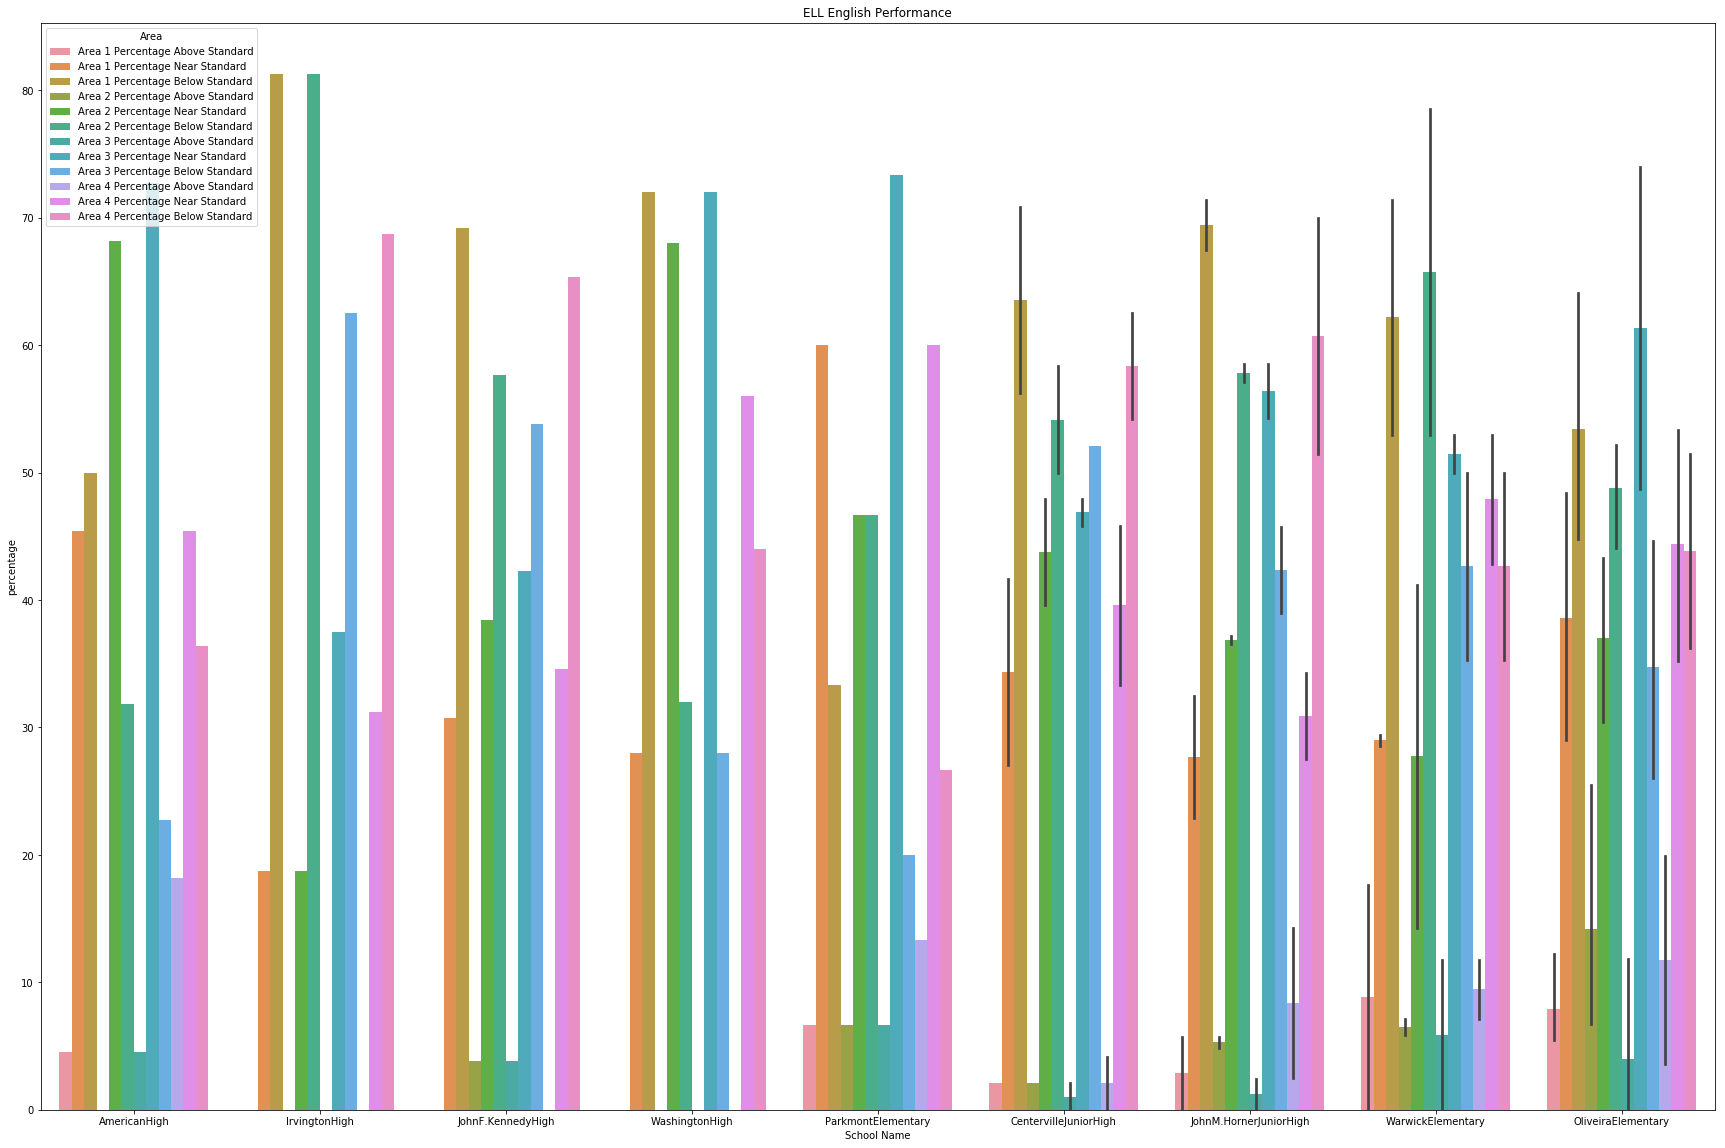

In [45]:
mell= eng[(eng["Demographic ID"]== 160)]
plt.figure(figsize=(30,20));
sb.barplot(x="School Name", y="percentage", hue="Area", data= mell)
plt.title("ELL English Performance");

For english learners in all three schools, we notice that they underperformed in Area 4, which is Research/Inquiry. 

### Parent Education Performance 

Another segmentation to explore for the ad campaign is Parent Education- specifically, focusing on college educated parents. 

In [99]:
def parent(number, table): 
    dell=table[table["Demographic ID"]== number]
    plt.figure(figsize=(30,20));
    sb.barplot(x="School Name", y="percentage", hue="Area", data= dell)
    x=table[table["Demographic ID"]== number]
    if table["Test Id"].reset_index()["Test Id"][0]== 2: 
        b= " in math"
    if table["Test Id"].reset_index()["Test Id"][0]==1: 
        b=" in english"
    plt.title(table.loc[table["Demographic ID"]== number].reset_index()["Demographic Name"][0]+ b);

In [136]:
education=[90,91,92,93,94]
for i in education: 
            x=merged[merged["Demographic ID"]==i]["CAASPP Reported Enrollment"].sum()
            print(" The total number of students whose parents are "+ merged.loc[merged["Demographic ID"]== i].reset_index()["Demographic Name"][0]+":"+str(x))

 The total number of students whose parents are Not a high school graduate:369.0
 The total number of students whose parents are High school graduate:1162.0
 The total number of students whose parents are Some college (includes AA degree):1368.0
 The total number of students whose parents are College graduate:4239.0
 The total number of students whose parents are Graduate school/Post graduate:5424.0


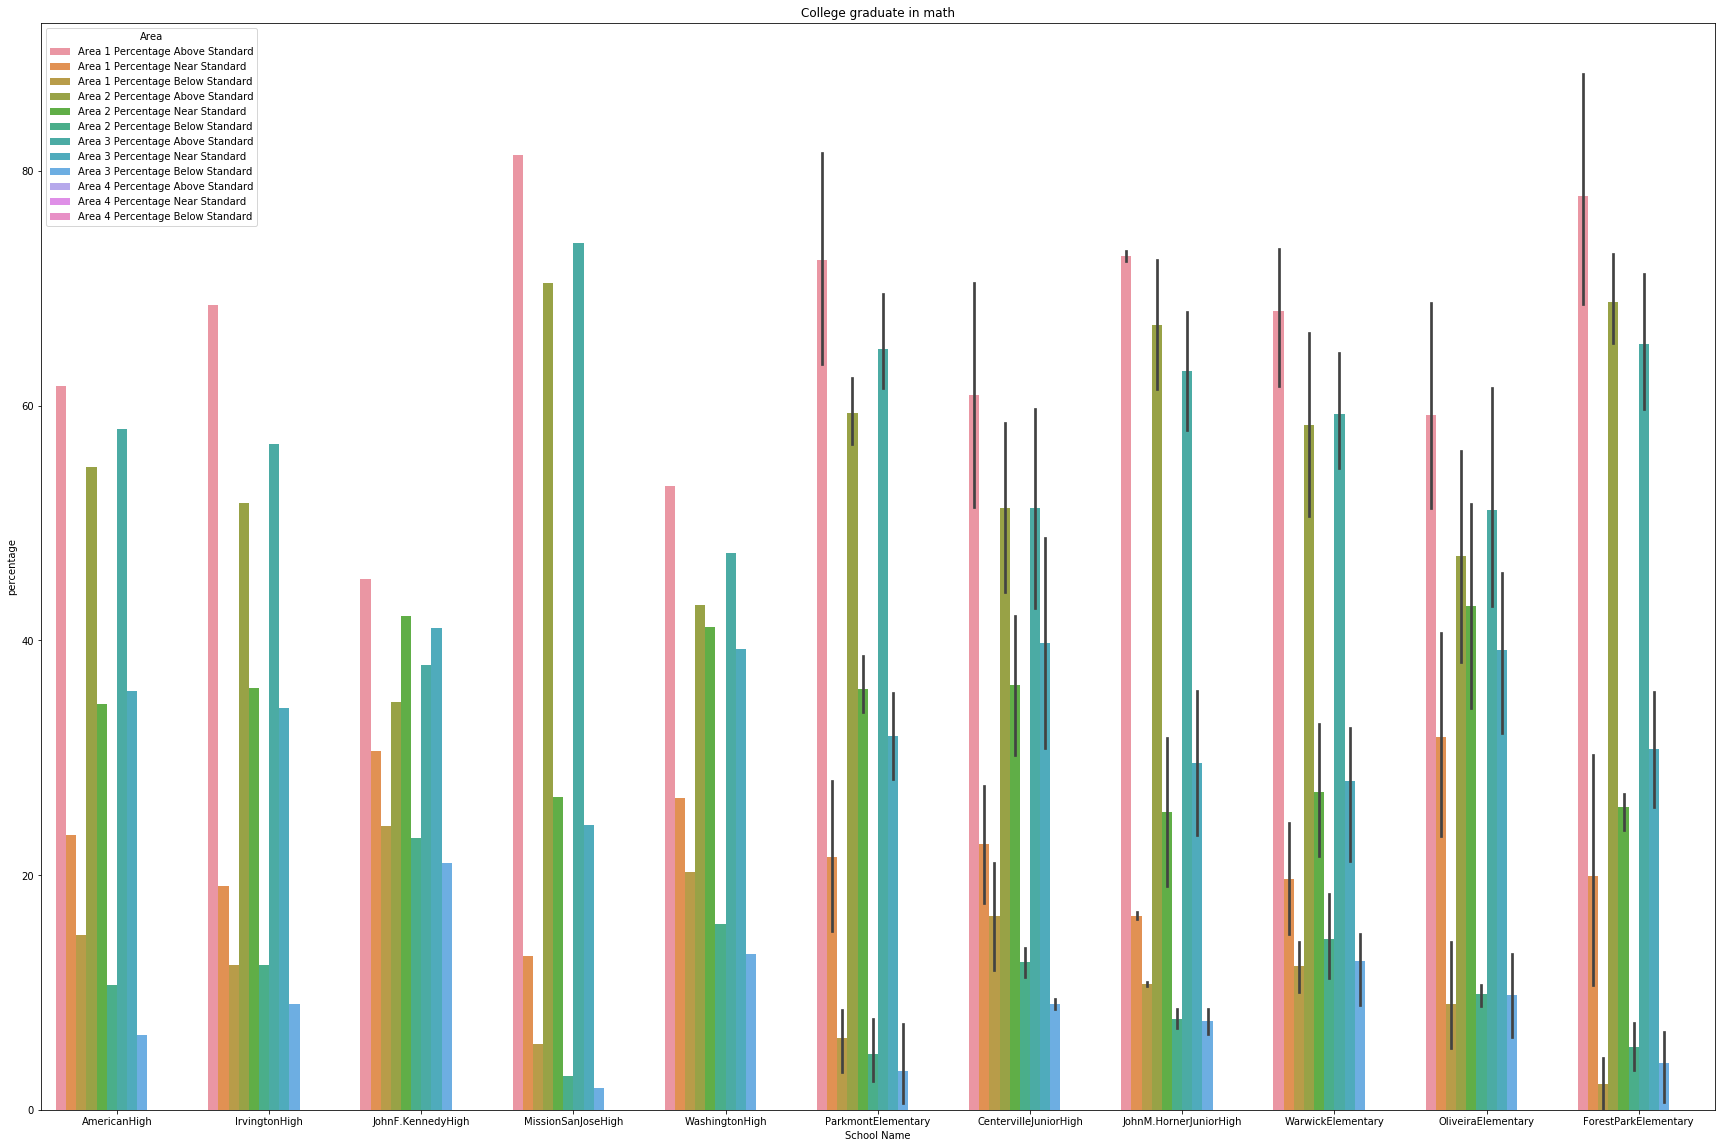

In [104]:
parent(number=93, table= math)

1. Students with college grad parents in American: Once again, Area 2 seems to be a problem. 
2. Students with College grad parents in Irvington: Area 2 becuase it has Lowest above, and highest meets expectation
3. Students with College grad parents in MSJ: Area 2 for same reason

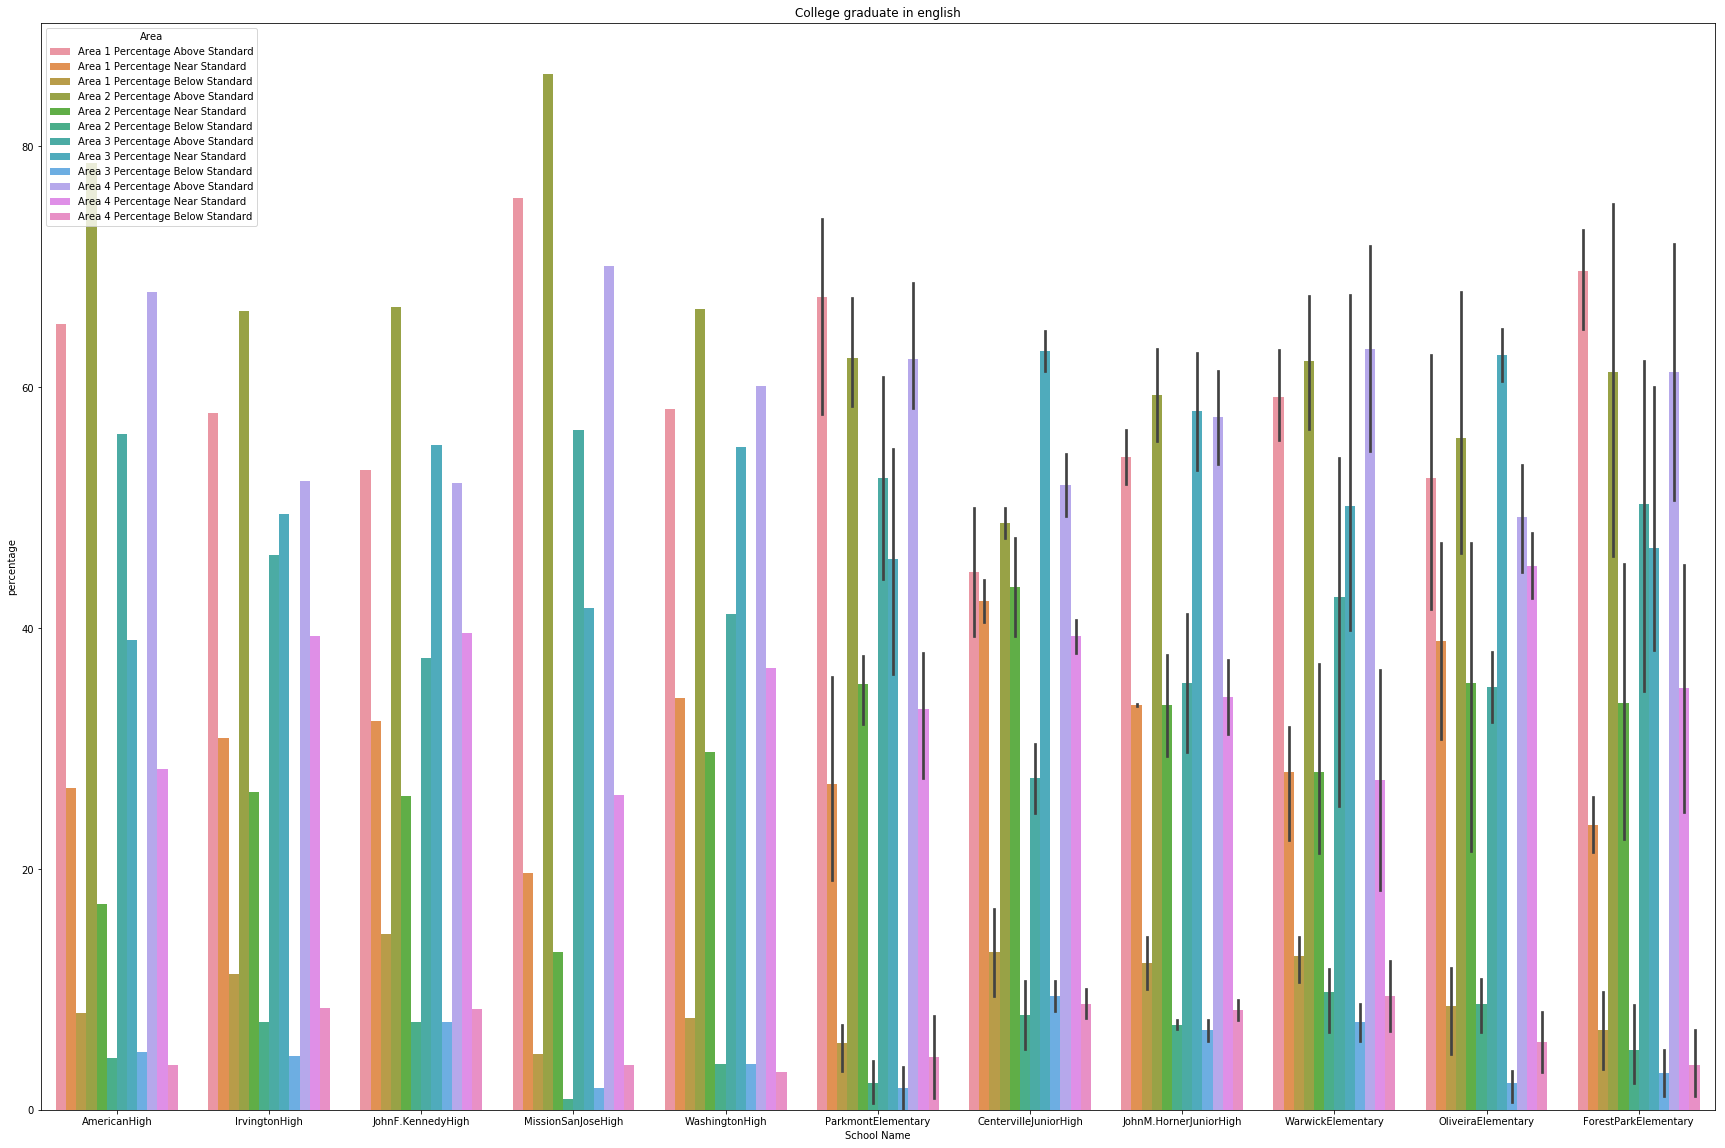

In [105]:
parent(number=93, table= eng)

Like the Asian analysis, Area 3 seems to pose the biggest problems. This similiar finding may be due to overlap in the two categories. 

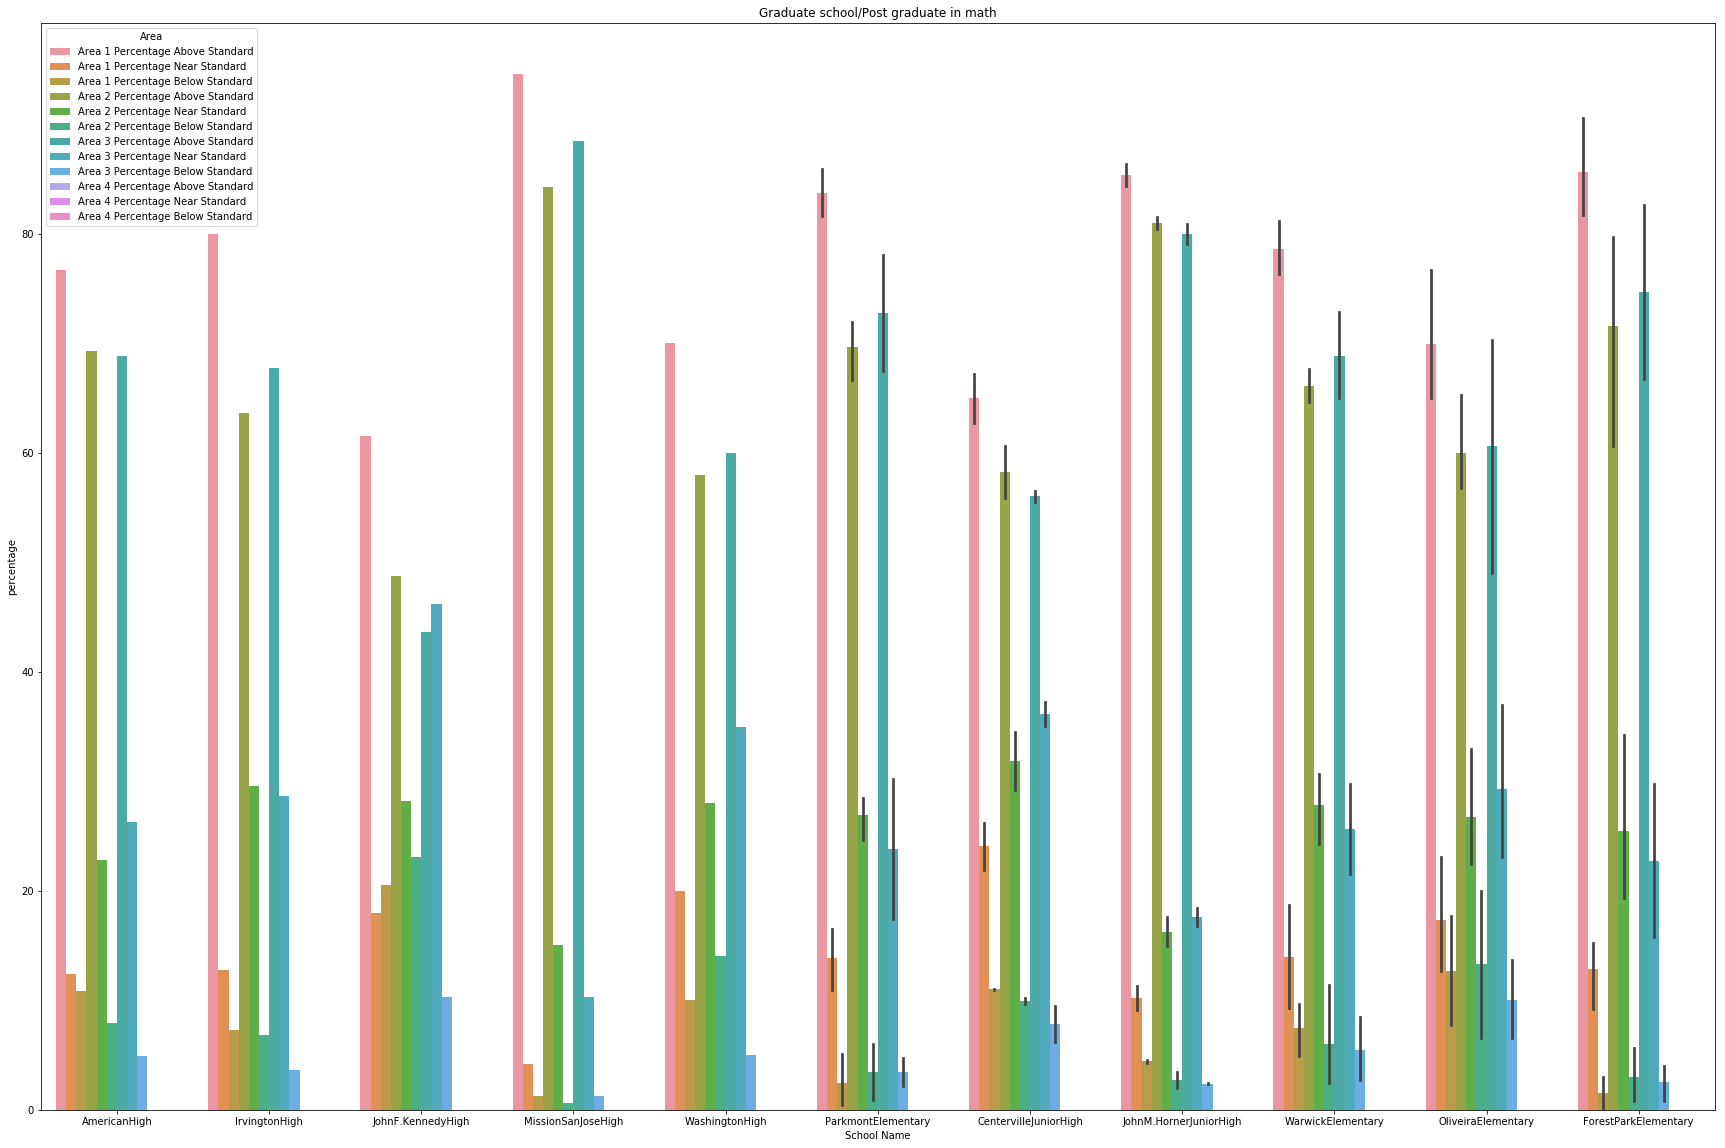

In [106]:
parent(number=94, table= math)

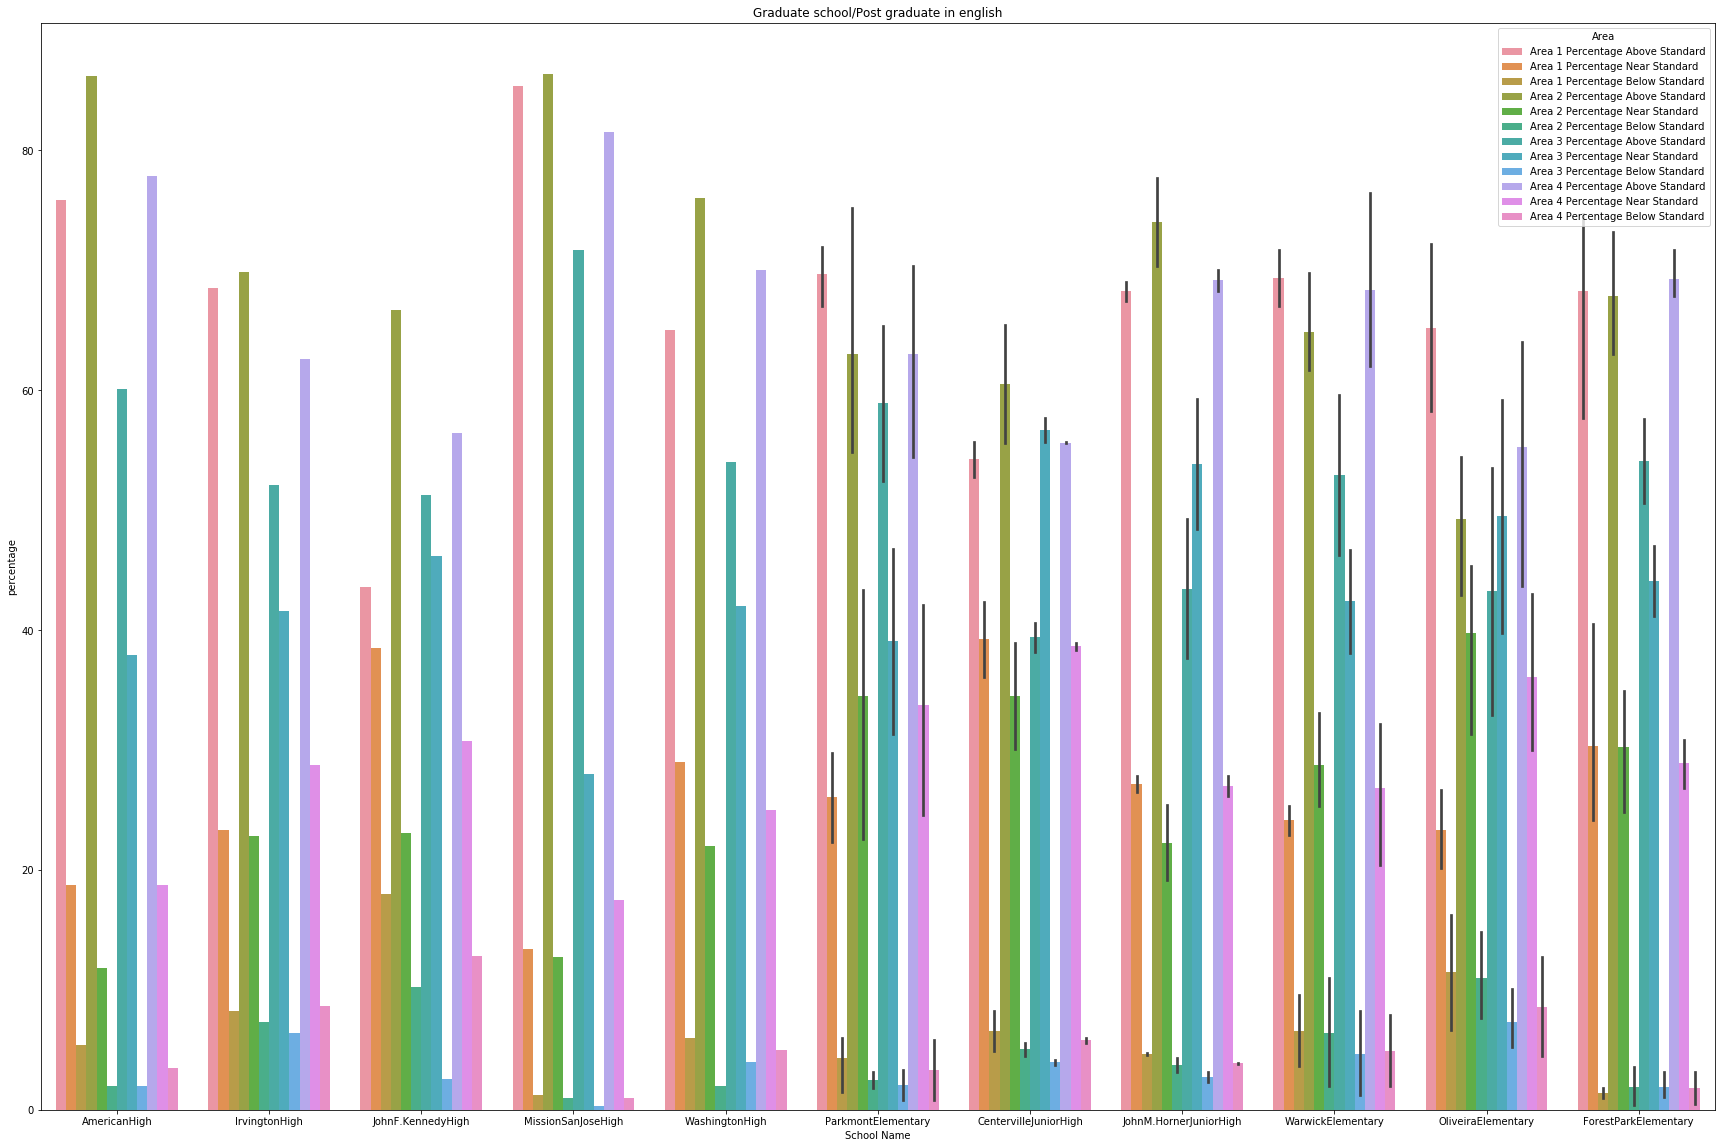

In [107]:
parent(number=94, table= eng)

Once again Area 2 for Math, and Area 3 For English. 

It is important to note that the reason I am looking at the category with the lowest above expectation, and highest near expectation, is because not many students score below expectation and I believe this is too small of a target for the ad campaign. 

### Key Take Aways for ad Campaign: 
There are three key take ways from this analysis: 
1. Math Focus for Banner: It seems that across our chosen campaign segments, the key area to mention in the banner is Area 2: Problem Solving and Data Analysis. This was picked because it is consistantly the lowest among our three schools, in the above expectations category, and had the highest near expectation result. 
2. English Focus Banner:  It seems that for the Asian and Parent Education segmentation the banner shoudl mention Area 3: Listening. However, for ELL, Area 4 Reasearch and Inquiry should be mentioned. 
3. Same trend among schools: Even though, I only have written comments for three high schools, it is clear that by looking across the graph that the same trends appear at all schools.  


## Next Steps 
There are three next steps: 
1. Now that we have identified the segments of interest, the next step is to understand how to effectivly target this segment using Facebooks Ad Campaign Features. 
2. Now that we have a clear idea of the ad, the next step is to make mock drawings. 
3. During the actual ad campaign, our previous ads and our new ad should be run.An A/B test should be conducted to check whether this advertisement idea actually provides any significant increase.  